# Week 6 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [36]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [19]:
noise = .2

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

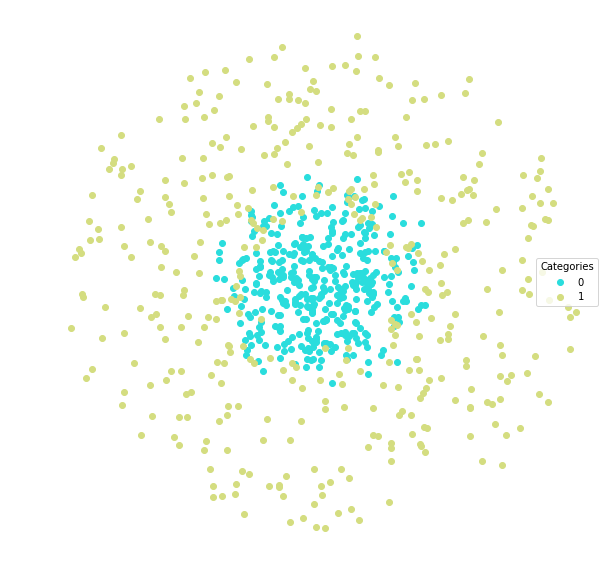

In [20]:
lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [6]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [7]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [8]:
lucem_illud.evaluateClassifier(clf, dfTest)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.920802           0.872212        0.08   0.898990  0.936842
1         0.920802           0.901014        0.08   0.940594  0.904762

This lets us look at which classes do better:

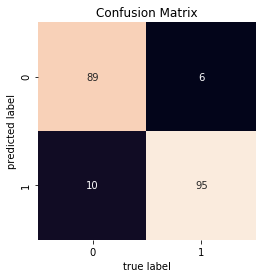

In [9]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

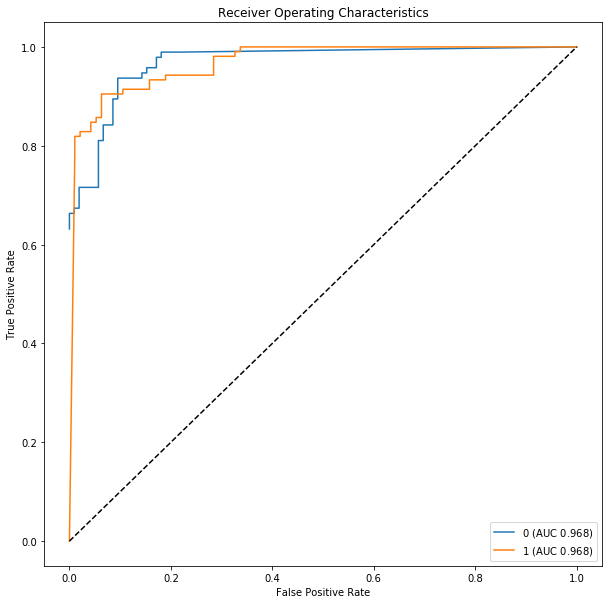

In [10]:
lucem_illud.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

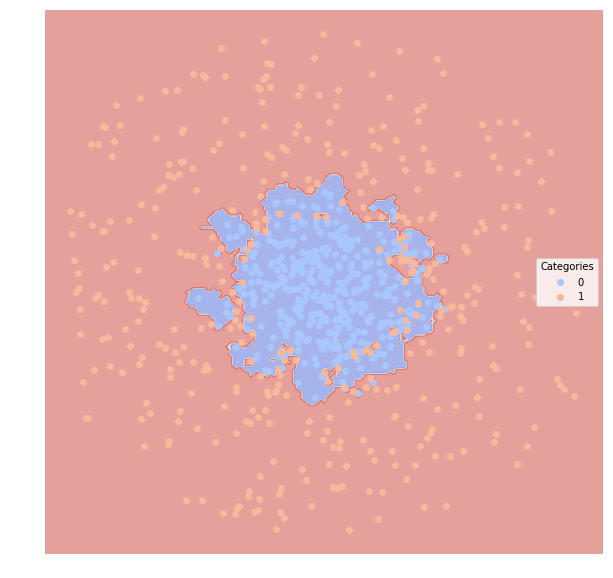

In [11]:
lucem_illud.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [12]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading Reddit data
Converting to vectors


In [13]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [14]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None)

In [15]:
lucem_illud.evaluateClassifier(clf, dfTest)

AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                      
Relationships            0.696281           0.449843    0.178683   0.700000   
Tales From Tech Support  0.868724           0.776982    0.072100   0.952381   
Weeaboo Tales            0.863963           0.620291    0.166144   0.643939   
Bad Roommates            0.803726           0.541659    0.141066   0.675676   

                           Recall  
Category                           
Relationships            0.454545  
Tales From Tech Support  0.750000  
Weeaboo Tales            0.934066  
Bad Roommates            0.704225

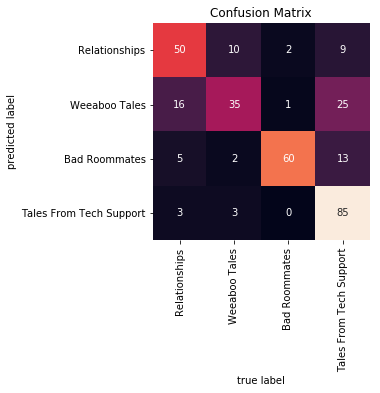

In [16]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

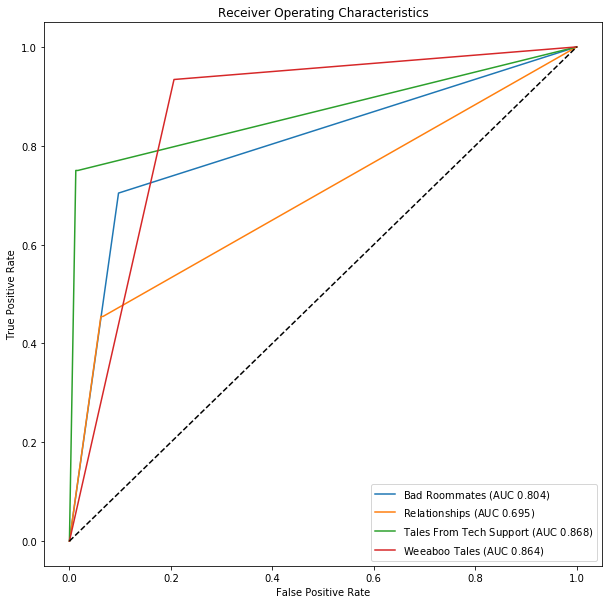

In [17]:
lucem_illud.plotMultiROC(clf, dfTest)

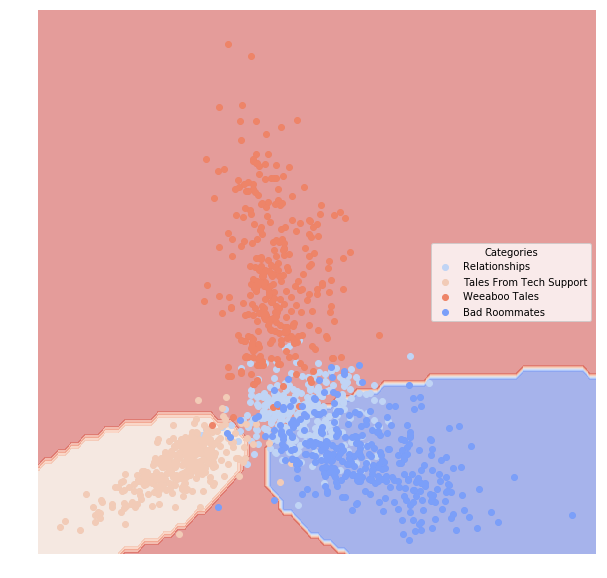

In [18]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

I created 10 dataset using the functions described above, and changing noise as follows:

In [ ]:
#GENERATE AND CLASSIFY 10 DISTINCT ARTIFICIAL DATASETS
noise1 = .3
noise2 = .5
noise3 = .7

dfTrain1, dfTest1 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain2, dfTest2 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise1))
dfTrain3, dfTest3 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise1)) 
dfTrain4, dfTest4 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise1))
dfTrain5, dfTest5 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise1))
dfTrain6, dfTest6 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise2))
dfTrain7, dfTest7 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2)) 
dfTrain8, dfTest8 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain9, dfTest9 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))
dfTrain0, dfTest0 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise3))

#FITTING THE MODELS FOR TRAINING DATA
#Bayes
clf_bayes = sklearn.naive_bayes.GaussianNB()
#Analogizes
clf_anlin = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
clf_anpol = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf_anknn = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
#Classical Regression
clf_regre = sklearn.linear_model.LogisticRegression()
#Symbolists
clf_sytre = sklearn.tree.DecisionTreeClassifier()
clf_syfor = sklearn.ensemble.RandomForestClassifier()
#Connectionists
clf_neune = sklearn.neural_network.MLPClassifier()
#Ensemble
clf_boost = sklearn.ensemble.GradientBoostingClassifier()

In the following cells I fit each dataset to the different models using the training data. 

In [103]:
clf_bayes.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_anlin.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_anpol.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_anknn.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_regre.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_sytre.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_syfor.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_neune.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
clf_boost.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])

print('DF TEST 1')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest1))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest1))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest1))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest1))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest1))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest1))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest1))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest1))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest1))

DF TEST 1
              AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                             
0         0.46949           0.455545        0.54   0.446970  0.627660
1         0.46949           0.516082        0.54   0.485294  0.311321
          AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                       
0         0.5               0.47        0.53       0.47     1.0
1         0.5               0.53        0.53       0.00     0.0
          AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                       
0         0.5               0.47        0.53       0.47     1.0
1         0.5               0.53        0.53       0.00     0.0
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.500602             0.4703         0.5   0.47

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
clf_bayes.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_anlin.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_anpol.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_anknn.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_regre.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_sytre.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_syfor.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_neune.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
clf_boost.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])

print('DF TEST 2')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest2))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest2))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest2))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest2))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest2))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest2))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest2))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest2))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest2))

DF TEST 1
               AUC  Average_Precision  Error_Rate  Precision   Recall
Category                                                             
0         0.850165           0.787380        0.15   0.838384  0.85567
1         0.850165           0.807579        0.15   0.861386  0.84466
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.859574            0.80468        0.14   0.863158  0.845361
1         0.859574            0.81396        0.14   0.857143  0.873786
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.808578           0.719468       0.195   0.737705  0.927835
1         0.808578           0.787458       0.195   0.910256  0.689320
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              


In [105]:
clf_bayes.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_anlin.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_anpol.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_anknn.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_regre.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_sytre.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_syfor.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_neune.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])
clf_boost.fit(np.stack(dfTrain3['vect'], axis=0), dfTrain3['category'])

print('DF TEST 3')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest3))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest3))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest3))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest3))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest3))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest3))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest3))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest3))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest3))

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.553708           0.606043       0.485       0.68  0.295652
1         0.553708           0.453412       0.485       0.46  0.811765
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.568286           0.615972        0.47   0.705882  0.313043
1         0.568286           0.461893        0.47   0.469799  0.823529
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.661637           0.692764       0.375   0.857143  0.417391
1         0.661637           0.524395       0.375   0.534722  0.905882
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                           

In [106]:
clf_bayes.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_anlin.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_anpol.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_anknn.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_regre.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_sytre.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_syfor.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_neune.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_boost.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])

print('DF TEST 4')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest4))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest4))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest4))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest4))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest4))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest4))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest4))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest4))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest4))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.855369           0.789853       0.145   0.838384  0.864583
1         0.855369           0.817243       0.145   0.871287  0.846154
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.575321           0.521501       0.435   0.529801  0.833333
1         0.575321           0.568697       0.435   0.673469  0.317308
          AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                       
0         0.5               0.48        0.52       0.48     1.0
1         0.5               0.52        0.52       0.00     0.0
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.860978      

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
clf_bayes.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_anlin.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_anpol.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_anknn.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_regre.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_sytre.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_syfor.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_neune.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_boost.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])

print('DF TEST 5')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest5))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest5))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest5))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest5))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest5))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest5))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest5))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest5))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest5))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         1.000000           1.000000       0.000   1.000000  1.000000
1         0.906145           0.759969       0.064   0.853211  0.853211
2         0.973994           0.950696       0.012   0.989691  0.950495
3         0.961324           0.890906       0.024   0.937500  0.937500
4         0.925741           0.781439       0.052   0.854369  0.888889
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.989474           0.982947       0.004   1.000000  0.978947
1         0.907424           0.766709       0.062   0.861111  0.853211
2         0.976439           0.939584       0.014   0.970000  0.960396
3         0.966533           0.899283       0.022   0.938144  0.947917
4         0.926988           0.788885       0.050   0.862745  0.888

In [108]:
clf_bayes.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_anlin.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_anpol.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_anknn.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_regre.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_sytre.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_syfor.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_neune.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])
clf_boost.fit(np.stack(dfTrain6['vect'], axis=0), dfTrain6['category'])

print('DF TEST 6')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest6))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest6))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest6))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest6))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest6))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest6))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest6))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest6))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest6))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.741587           0.700110        0.26   0.776596  0.701923
1         0.741587           0.657771        0.26   0.707547  0.781250
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.745994           0.702593       0.255   0.773196  0.721154
1         0.745994           0.663803       0.255   0.718447  0.770833
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.757212           0.703064        0.24   0.741379  0.826923
1         0.757212           0.690179        0.24   0.785714  0.687500
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                           

In [109]:
clf_bayes.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_anlin.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_anpol.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_anknn.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_regre.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_sytre.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_syfor.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_neune.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])
clf_boost.fit(np.stack(dfTrain7['vect'], axis=0), dfTrain7['category'])

print('DF TEST 7')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest7))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest7))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest7))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest7))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest7))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest7))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest7))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest7))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest7))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.465946           0.504170       0.535   0.484211  0.442308
1         0.465946           0.464147       0.535   0.447619  0.489583
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.580529           0.565253       0.415   0.585366  0.692308
1         0.580529           0.528945       0.415   0.584416  0.468750
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.717147           0.696876        0.29   0.848485  0.538462
1         0.717147           0.624938        0.29   0.641791  0.895833
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                           

In [110]:
clf_bayes.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_anlin.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_anpol.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_anknn.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_regre.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_sytre.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_syfor.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_neune.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])
clf_boost.fit(np.stack(dfTrain8['vect'], axis=0), dfTrain8['category'])

print('DF TEST 8')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest8))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest8))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest8))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest8))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest8))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest8))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest8))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest8))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest8))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.668151           0.593247       0.335      0.625  0.773196
1         0.668151           0.633252       0.335      0.725  0.563107
              AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                             
0         0.52222           0.496443       0.485   0.500000  0.762887
1         0.52222           0.527020       0.485   0.557692  0.281553
          AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                       
0         0.5              0.485       0.515      0.485     1.0
1         0.5              0.515       0.515      0.000     0.0
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.681213          

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [111]:
clf_bayes.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_anlin.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_anpol.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_anknn.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_regre.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_sytre.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_syfor.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_neune.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])
clf_boost.fit(np.stack(dfTrain9['vect'], axis=0), dfTrain9['category'])

print('DF TEST 9')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest9))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest9))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest9))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest9))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest9))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest9))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest9))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest9))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest9))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.965333           0.919626       0.024   0.959350  0.944000
1         0.898915           0.736575       0.062   0.843750  0.835052
2         0.998792           0.988506       0.002   0.988506  1.000000
3         0.938325           0.821153       0.038   0.891304  0.901099
4         0.998747           0.990196       0.002   0.990196  1.000000
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.964000           0.912323       0.026   0.951613  0.944000
1         0.904070           0.744635       0.060   0.845361  0.845361
2         0.998792           0.988506       0.002   0.988506  1.000000
3         0.938325           0.821153       0.038   0.891304  0.901099
4         0.995050           0.992099       0.002   1.000000  0.990

In [112]:
clf_bayes.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_anlin.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_anpol.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_anknn.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_regre.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_sytre.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_syfor.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_neune.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])
clf_boost.fit(np.stack(dfTrain0['vect'], axis=0), dfTrain0['category'])

print('DF TEST 0')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest0))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest0))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest0))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest0))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest0))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest0))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest0))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest0))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest0))

DF TEST 2
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         1.000000           1.000000       0.000   1.000000  1.000000
1         1.000000           1.000000       0.000   1.000000  1.000000
2         0.963766           0.922209       0.020   0.971154  0.935185
3         0.861733           0.592278       0.102   0.691589  0.804348
4         0.796206           0.543785       0.114   0.732558  0.649485
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         1.000000           1.000000       0.000   1.000000  1.000000
1         1.000000           1.000000       0.000   1.000000  1.000000
2         0.963766           0.922209       0.020   0.971154  0.935185
3         0.871377           0.602751       0.100   0.690909  0.826087
4         0.793533           0.547456       0.112   0.746988  0.639

DF TEST 1

bayes


/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


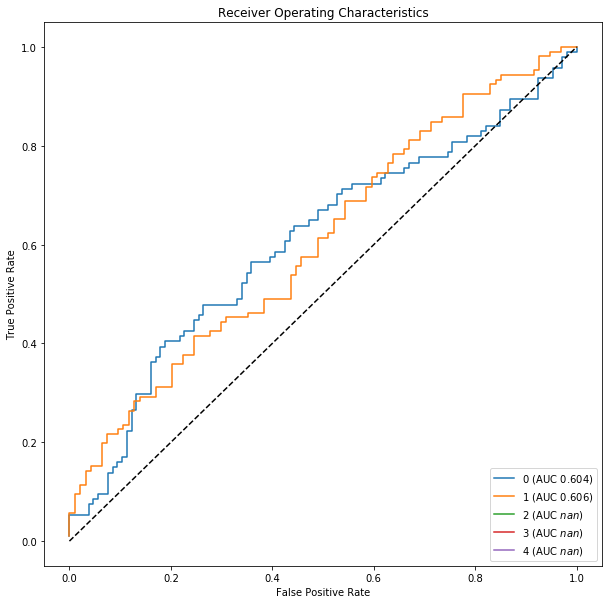

svm lin


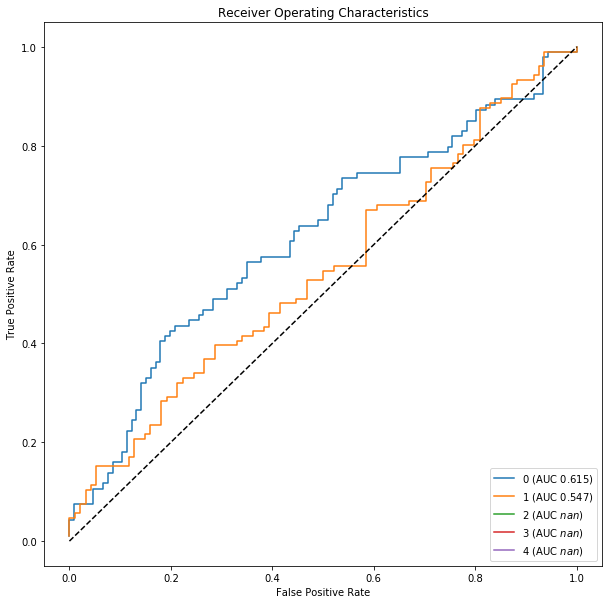

svm poly


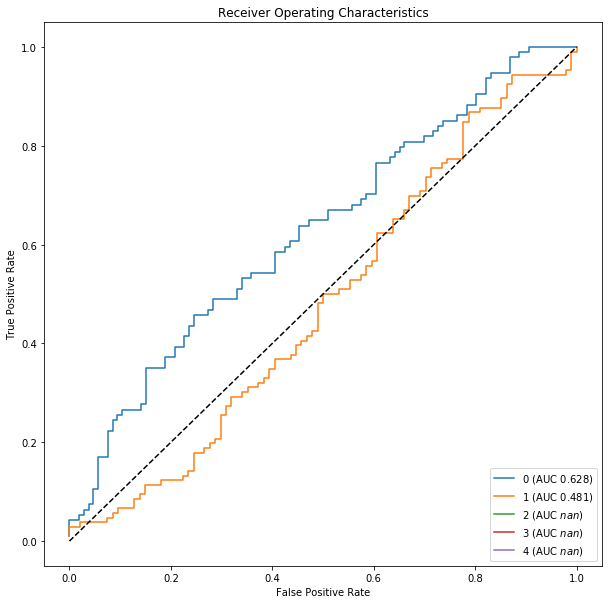

knn


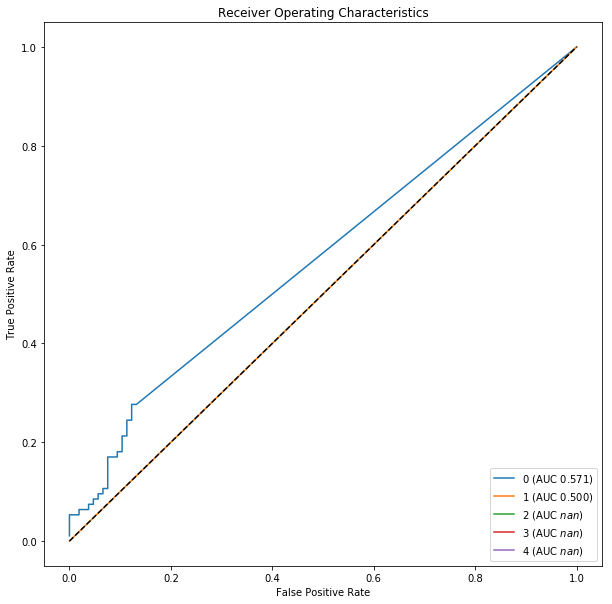

regression


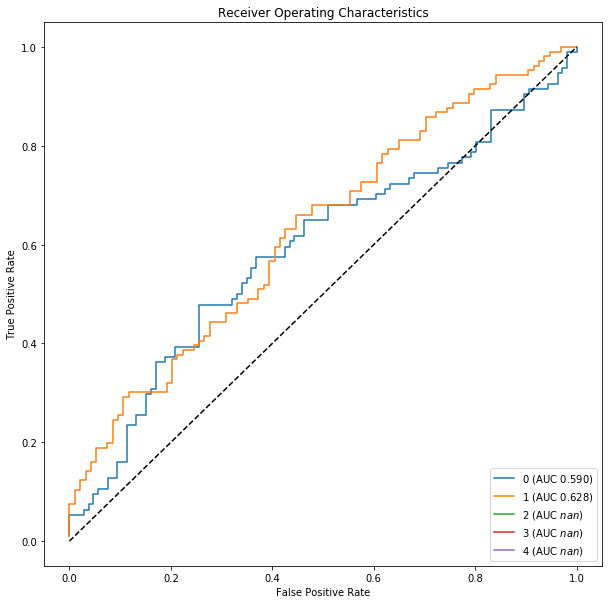

DT


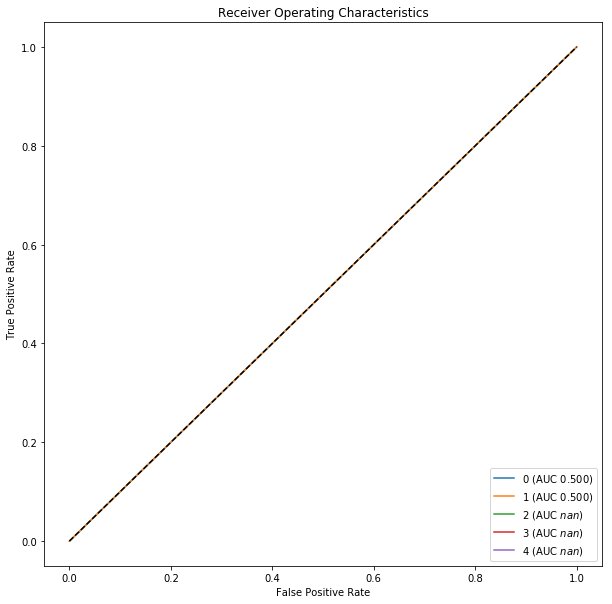

random forest


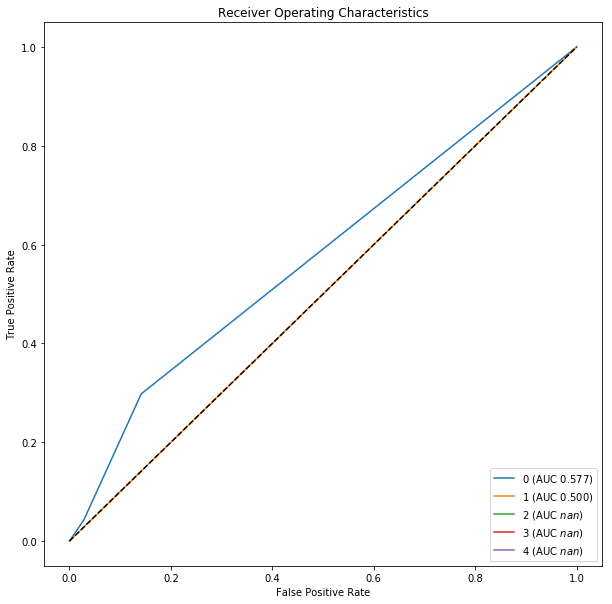

neural net


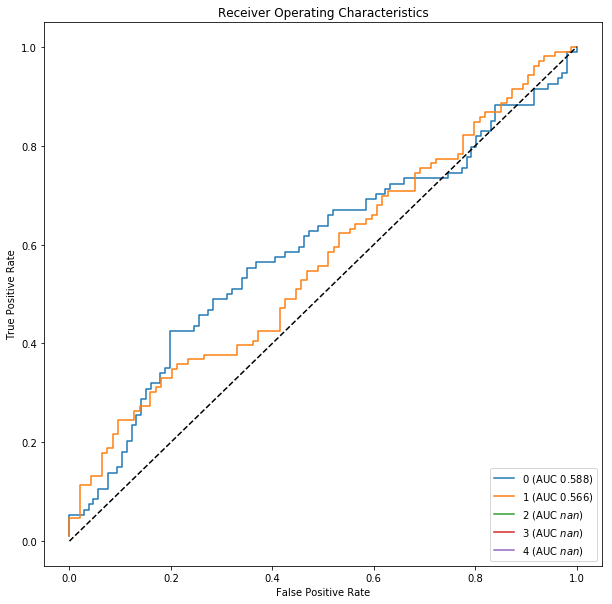

boost


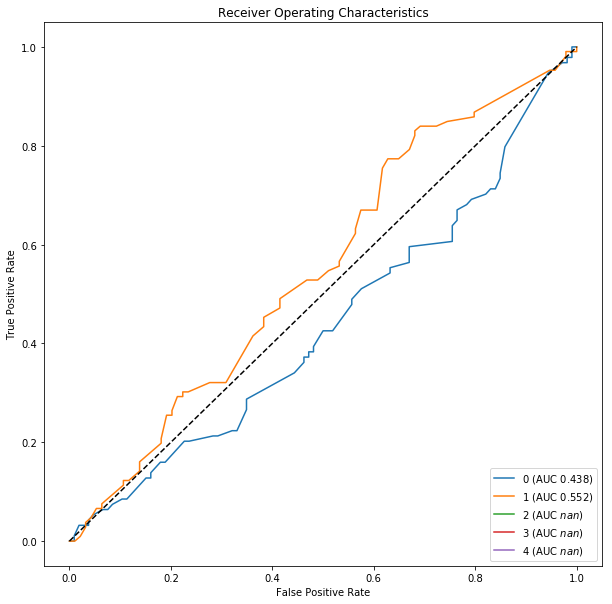




DF TEST 2

bayes


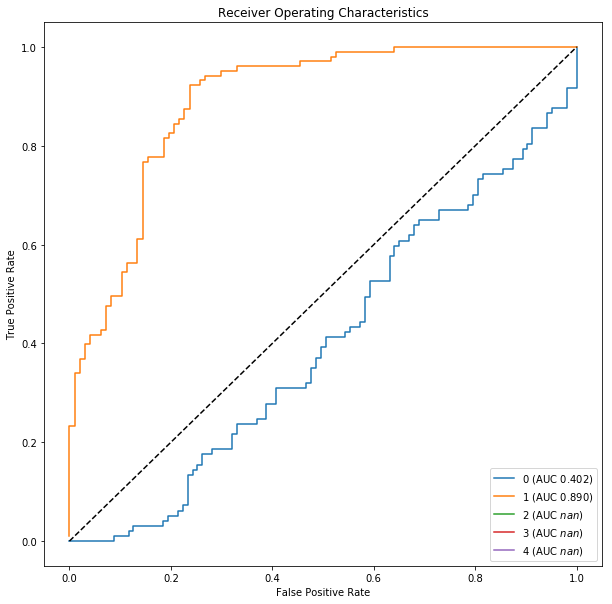

svm lin


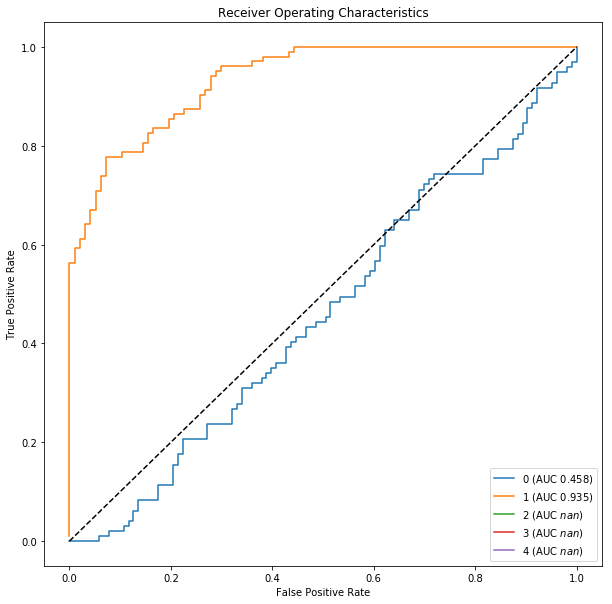

svm poly


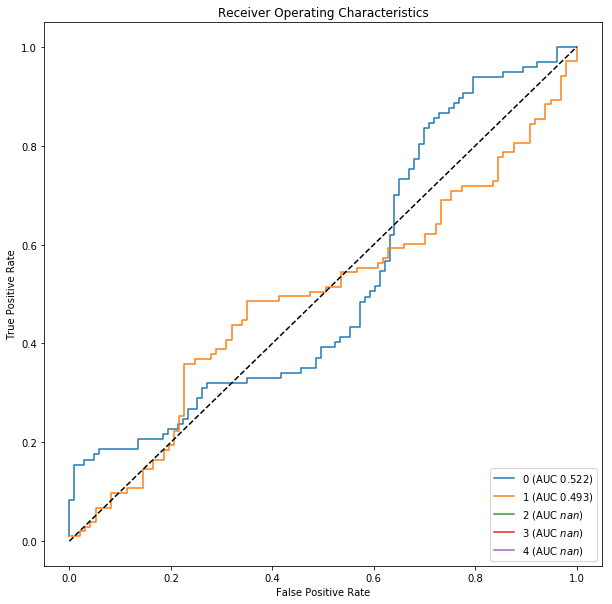

knn


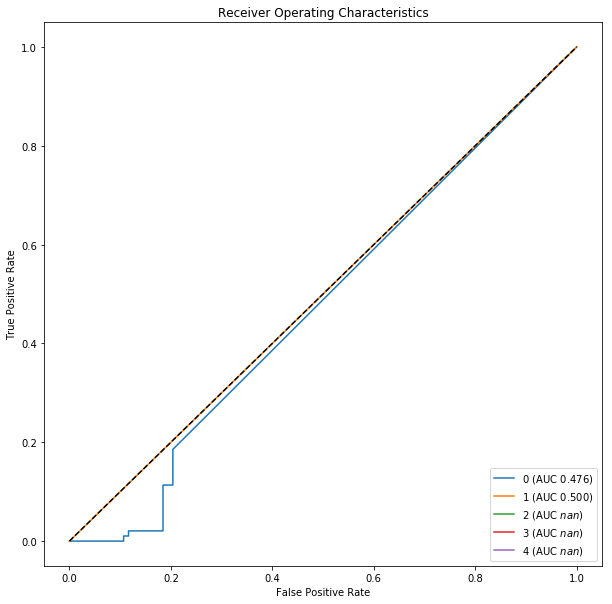

regression


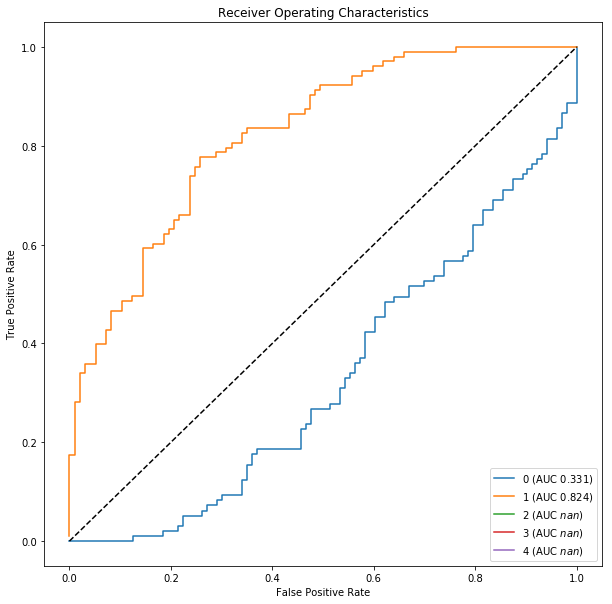

DT


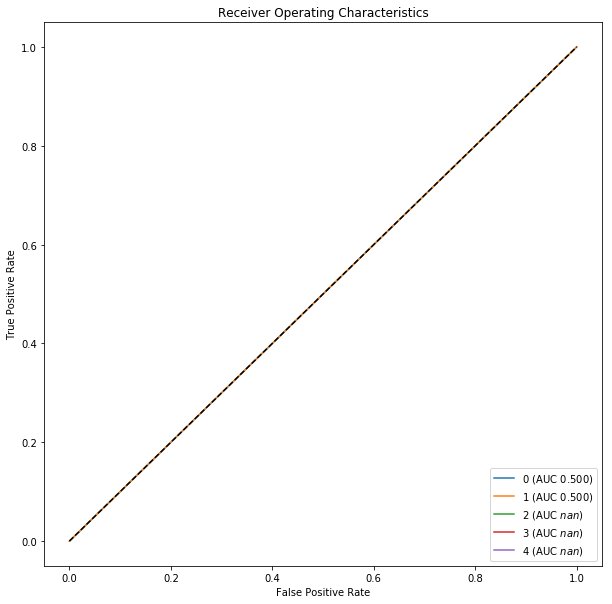

random forest


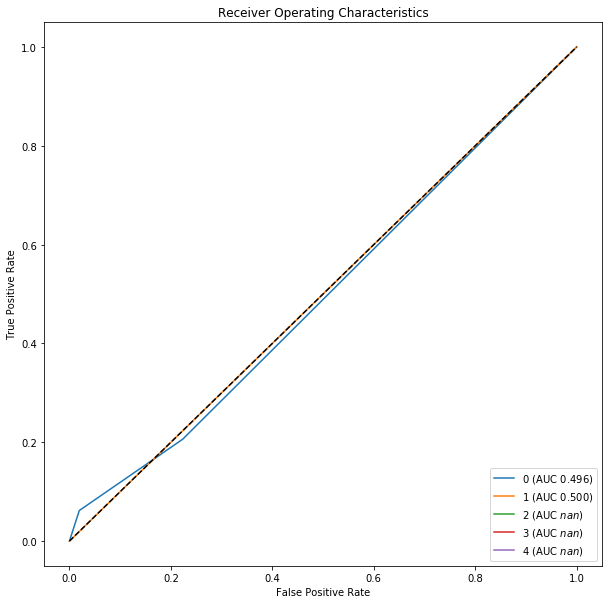

neural net


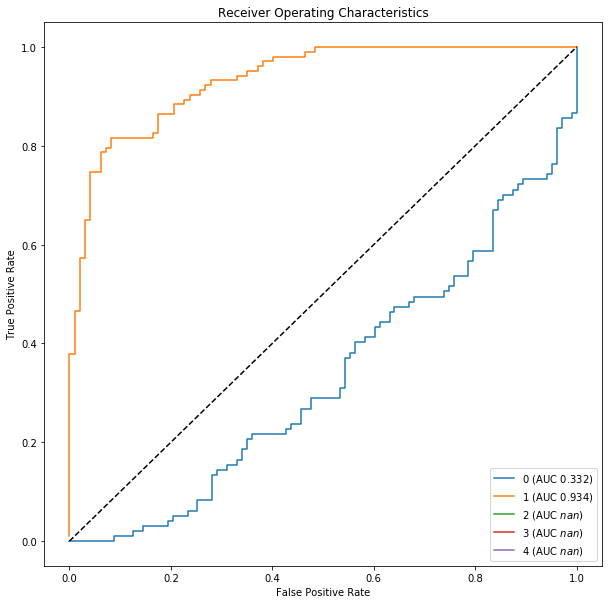

boost


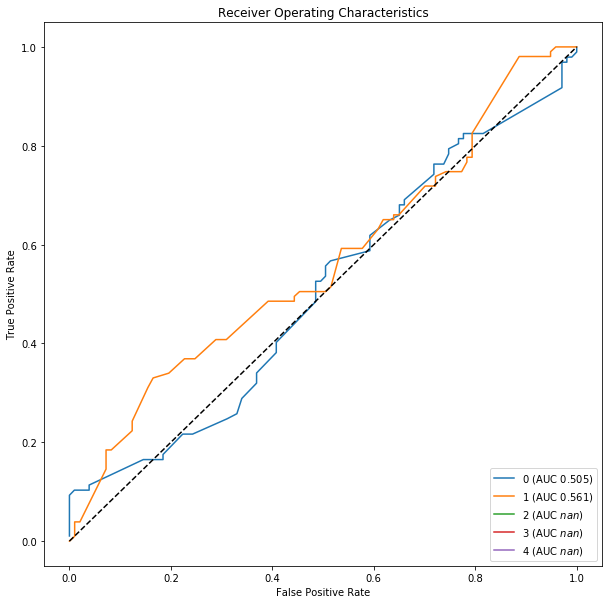




DF TEST 3

bayes


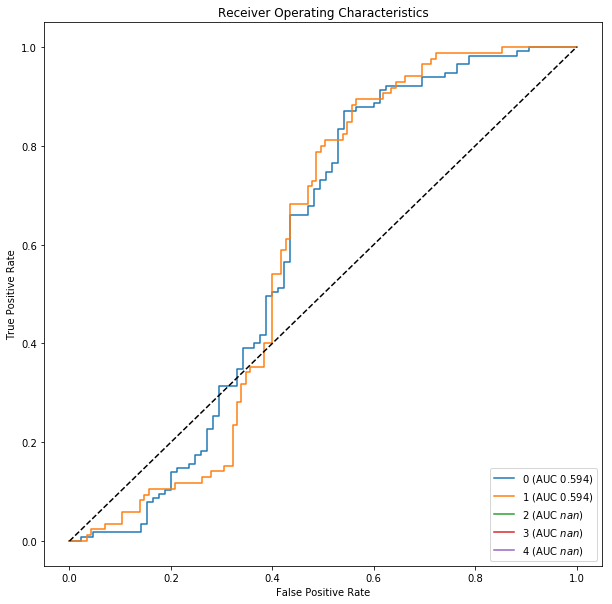

svm lin


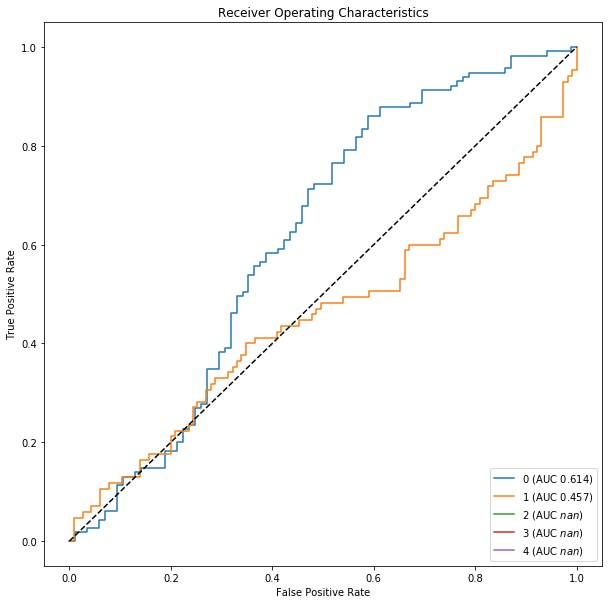

svm poly


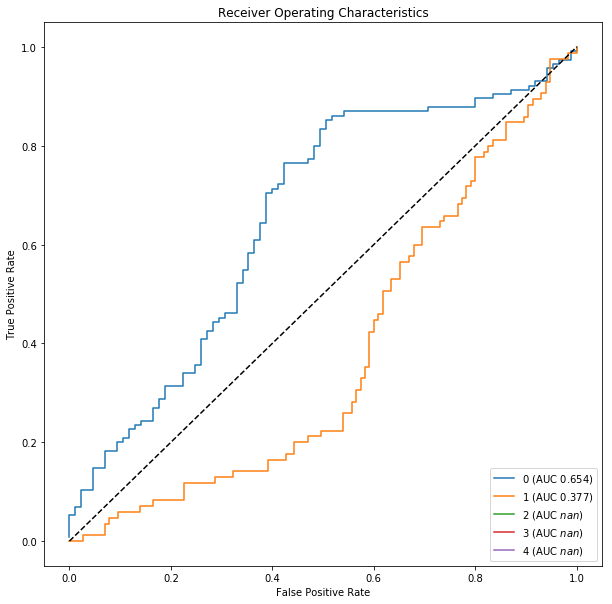

knn


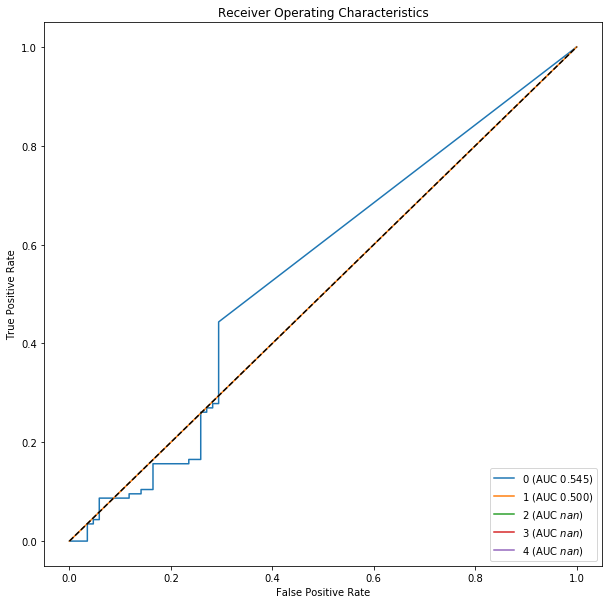

regression


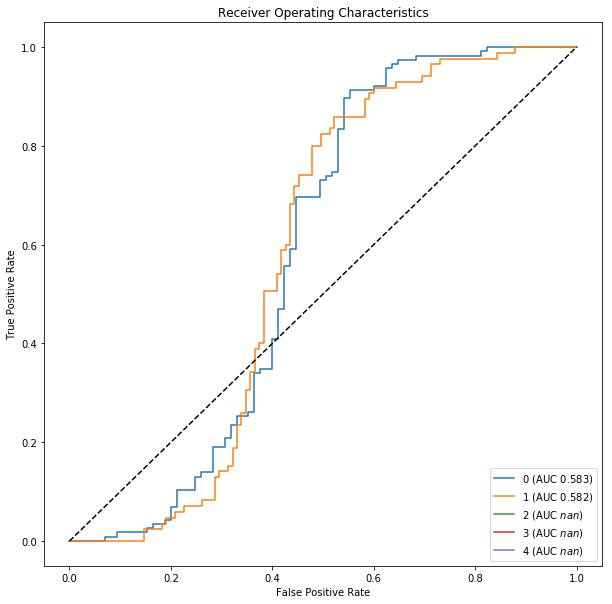

DT


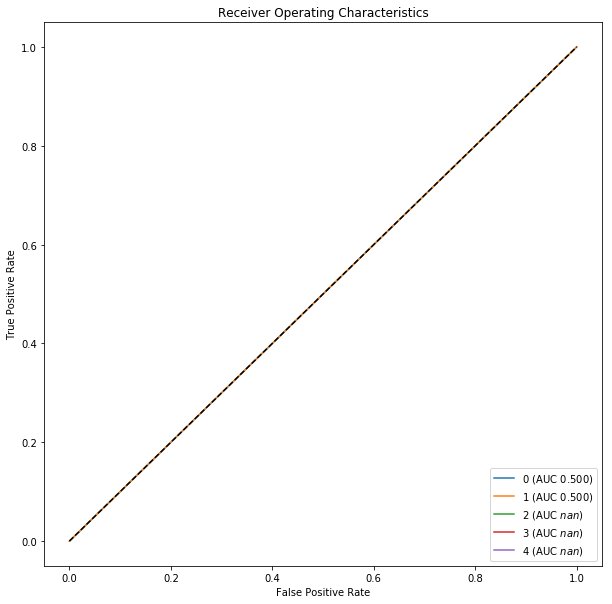

random forest


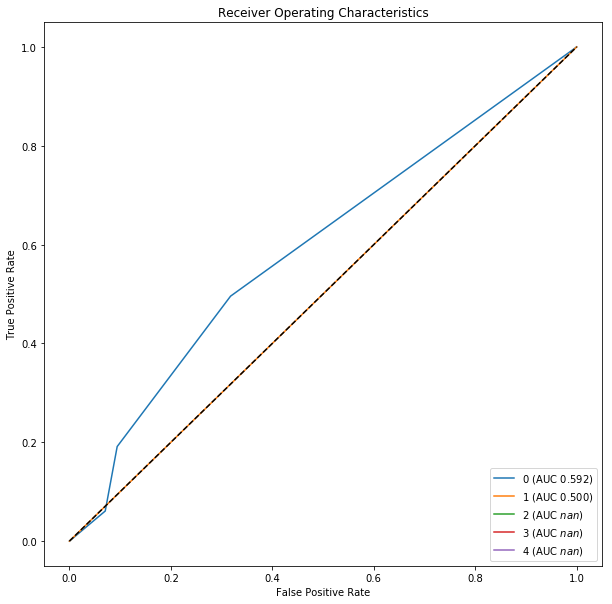

neural net


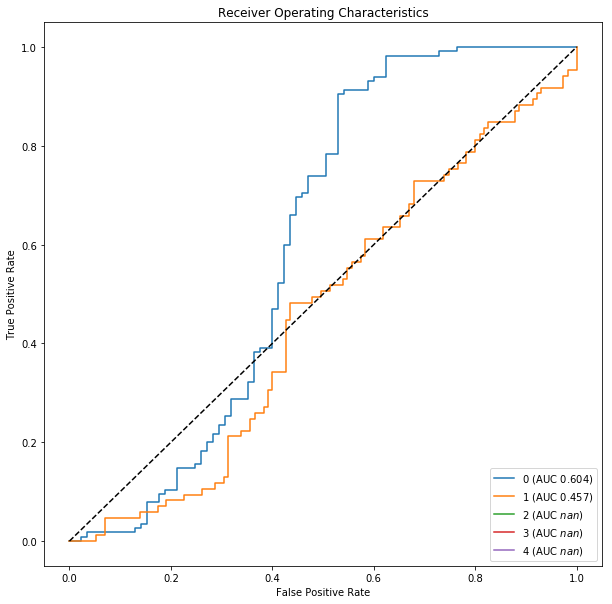

boost


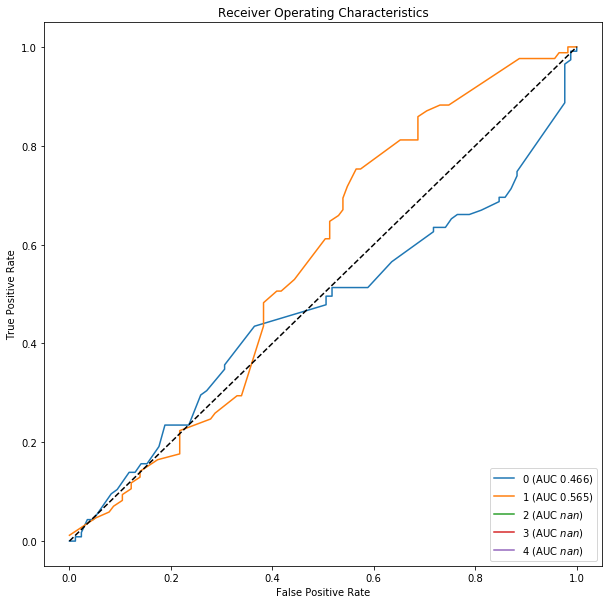




DF TEST 4

bayes


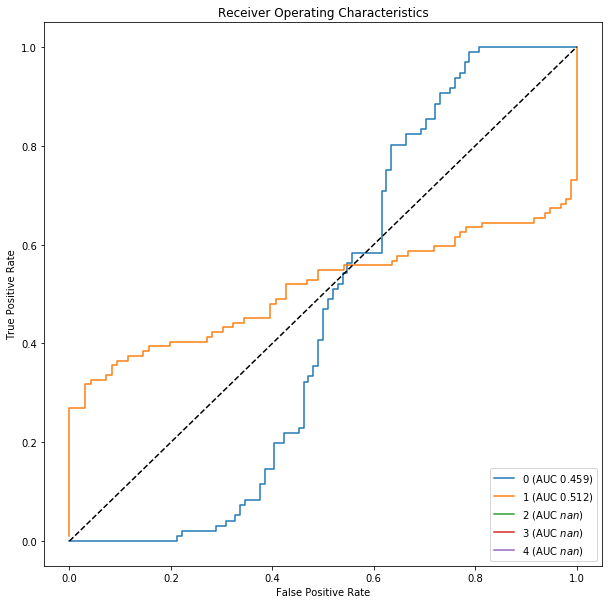

svm lin


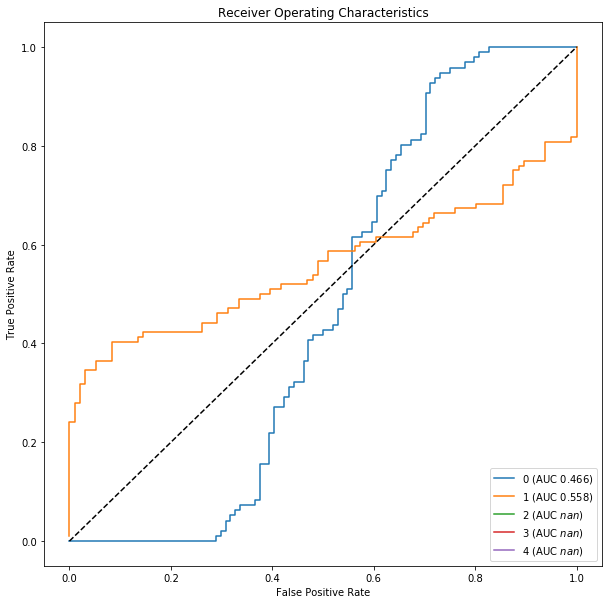

svm poly


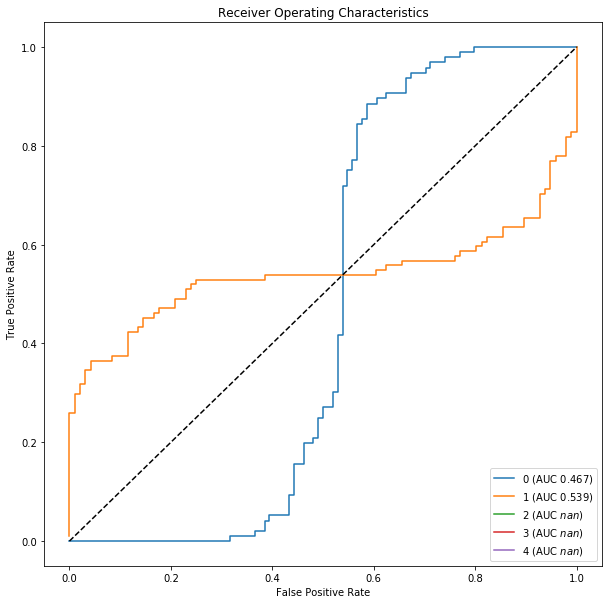

knn


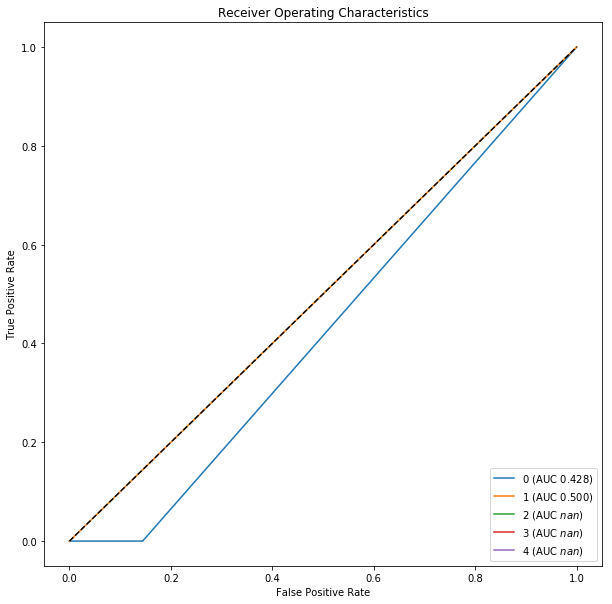

regression


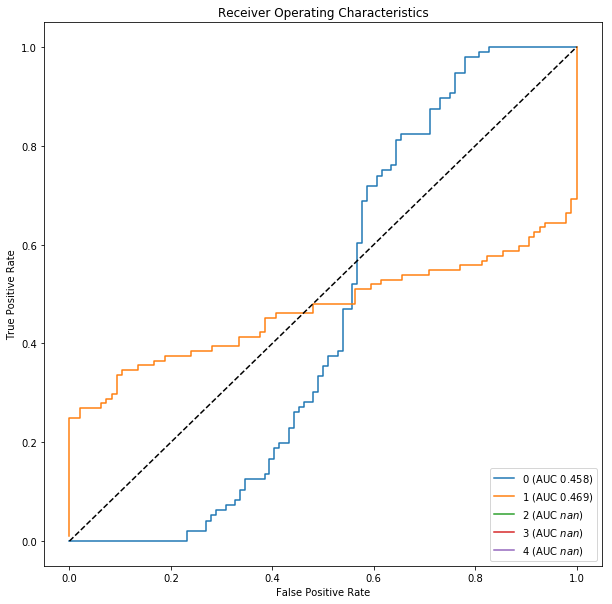

DT


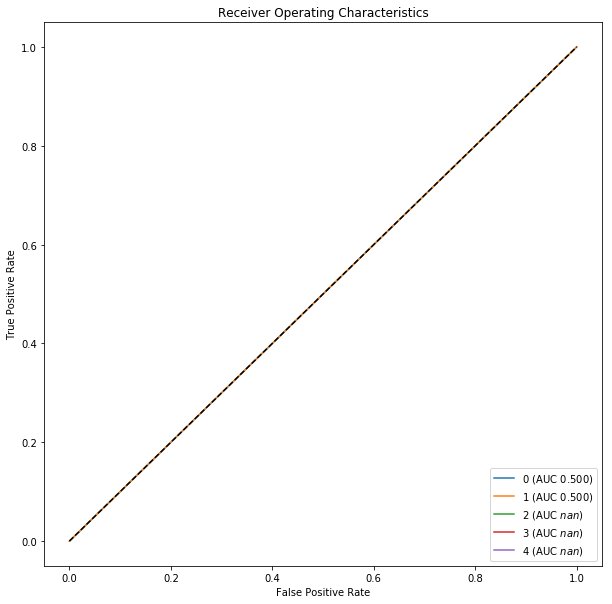

random forest


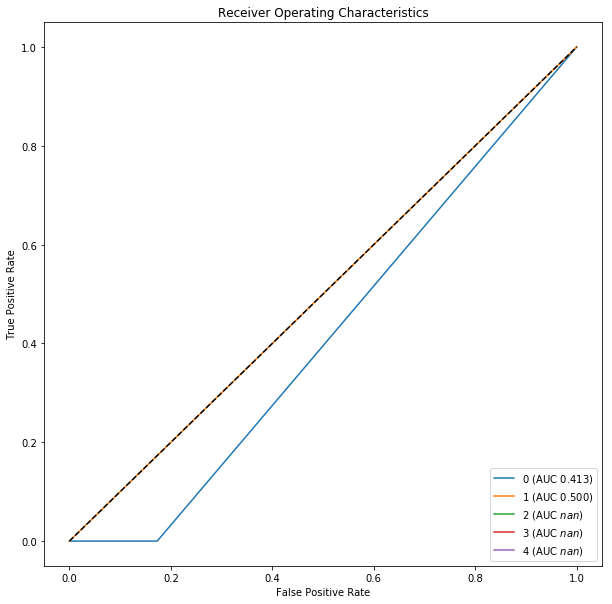

neural net


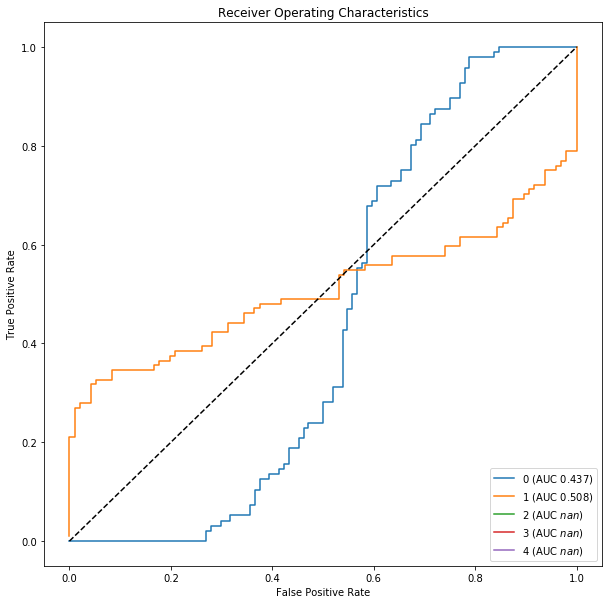

boost


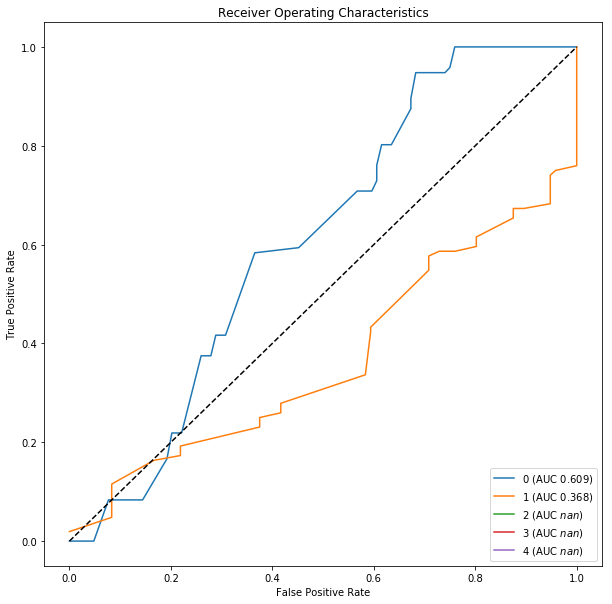




DF TEST 5

bayes


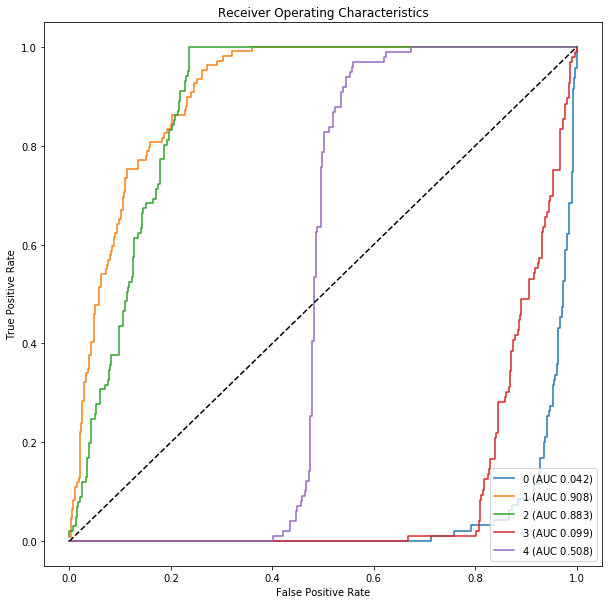

svm lin


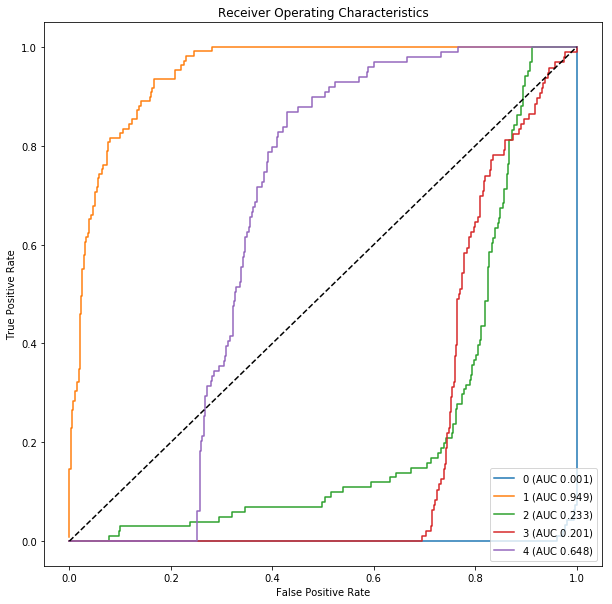

svm poly


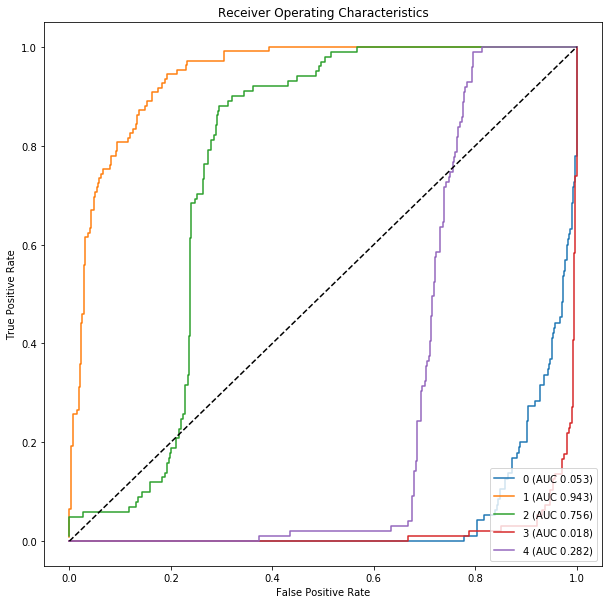

knn


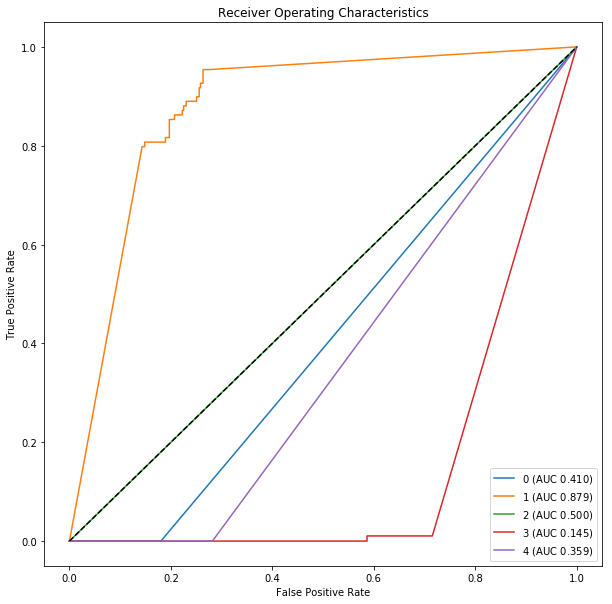

regression


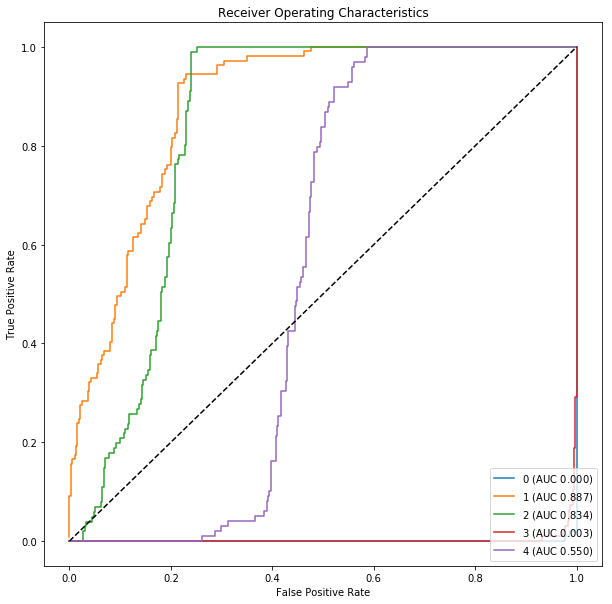

DT


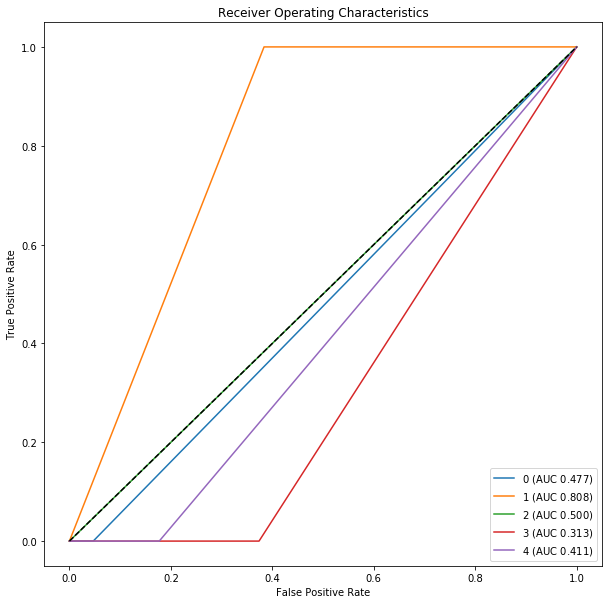

random forest


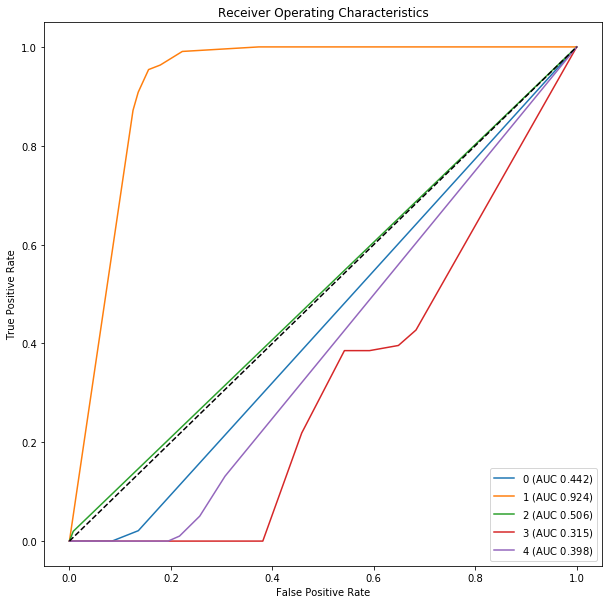

neural net


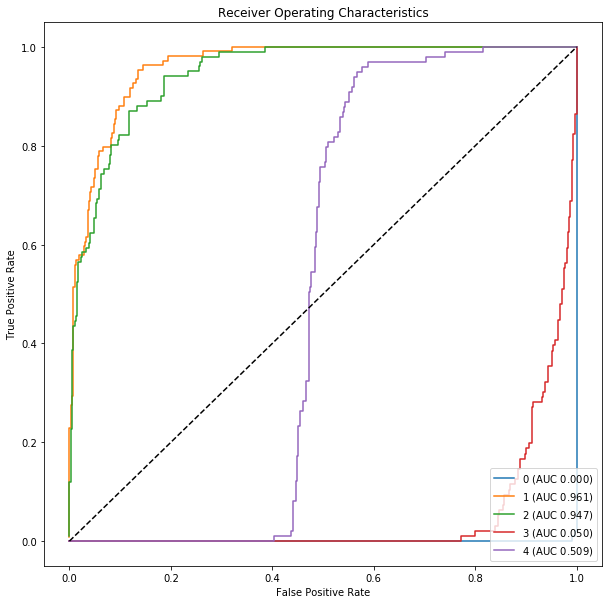

boost


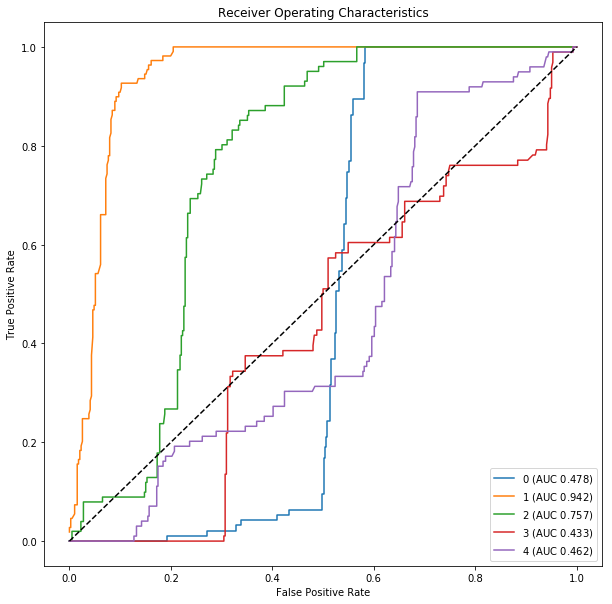




DF TEST 6

bayes


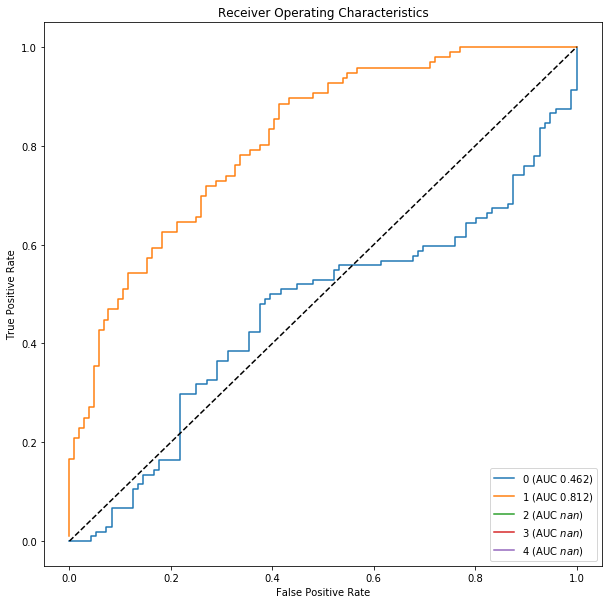

svm lin


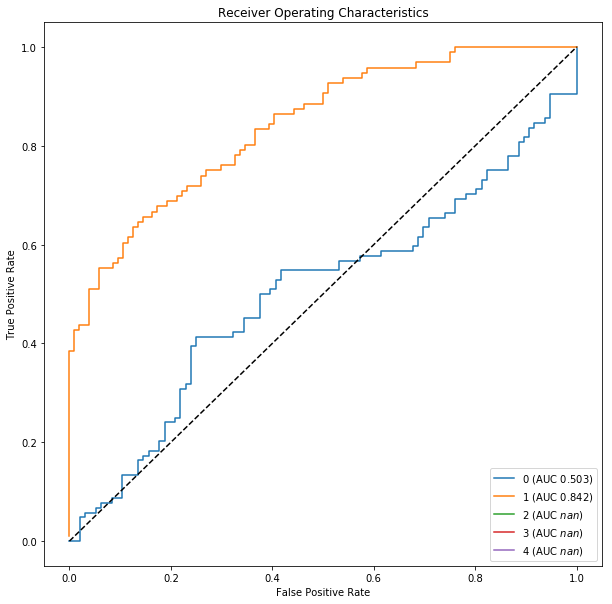

svm poly


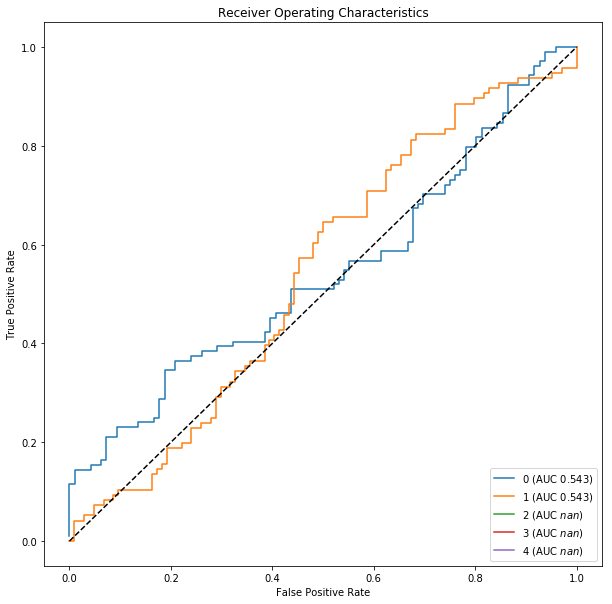

knn


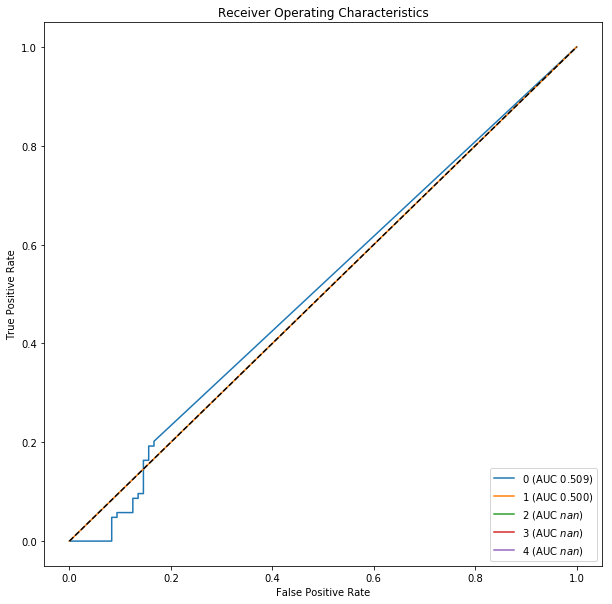

regression


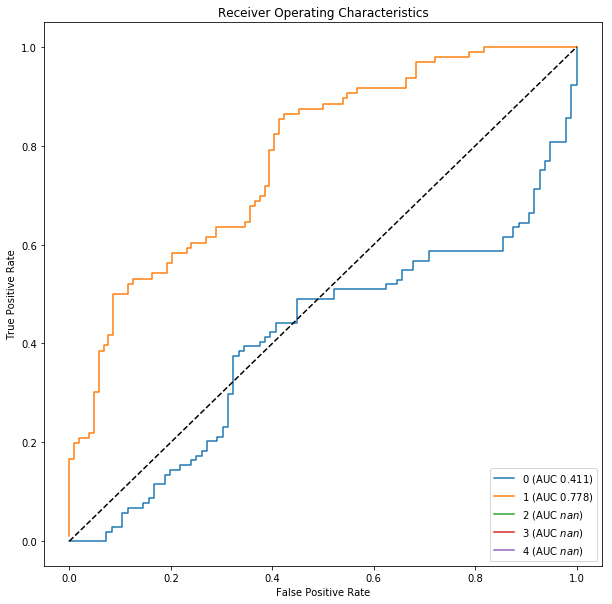

DT


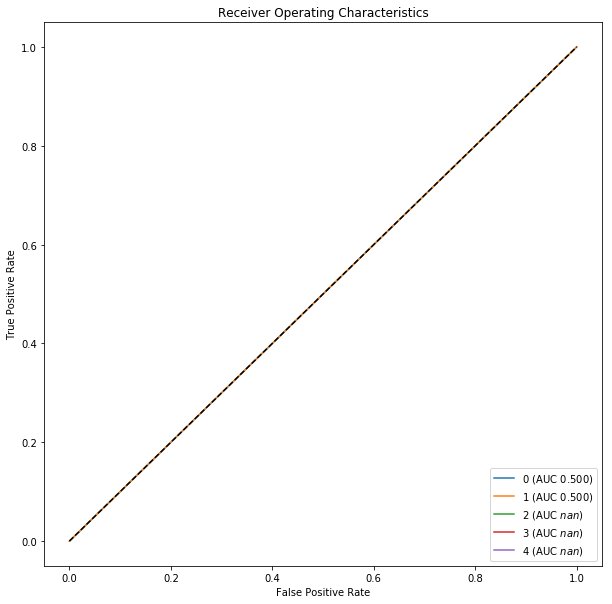

random forest


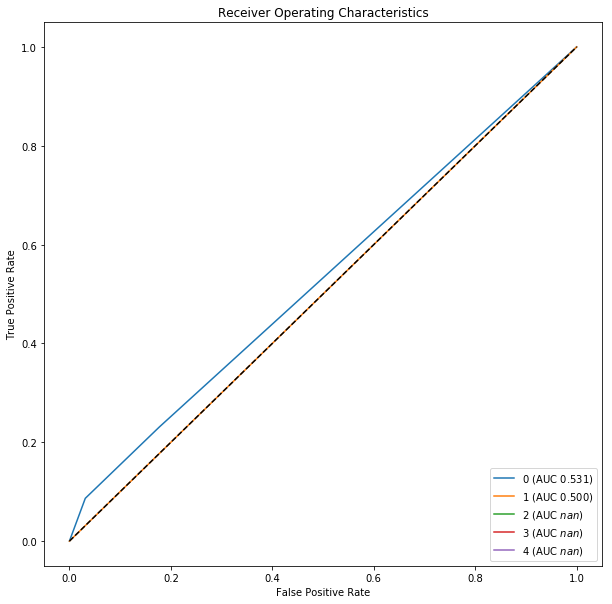

neural net


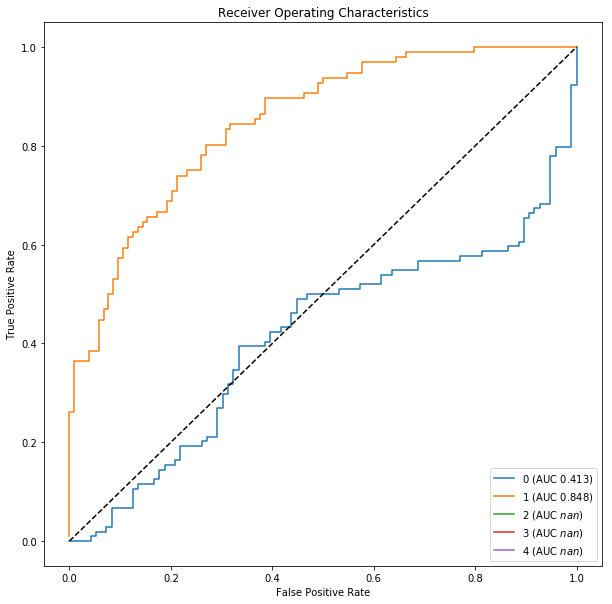

boost


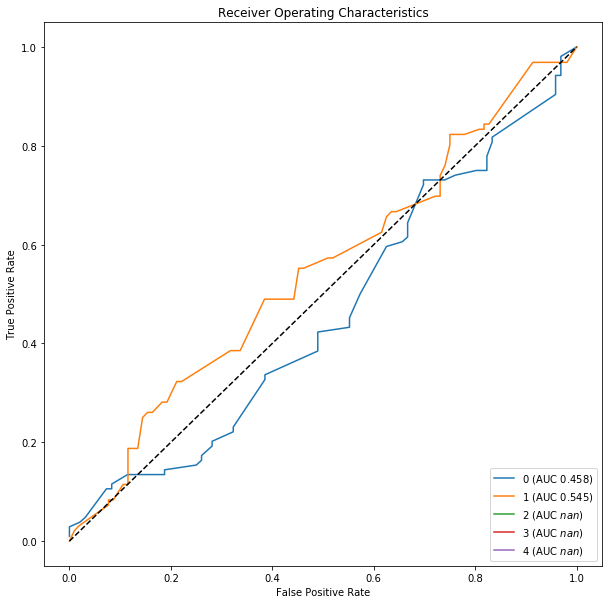




DF TEST 7

bayes


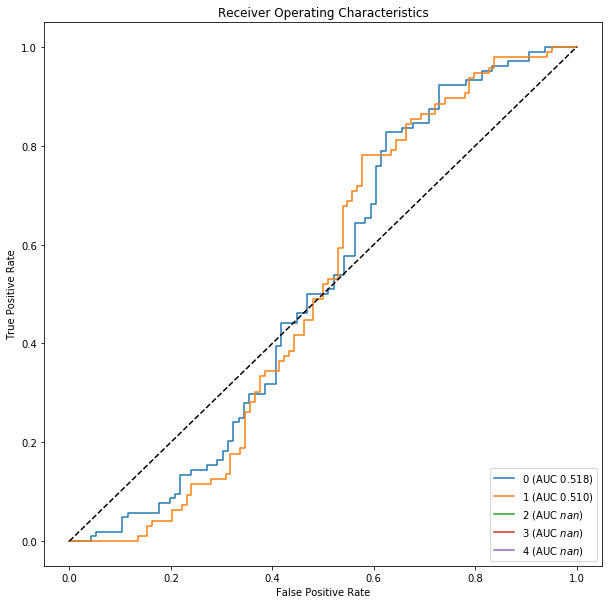

svm lin


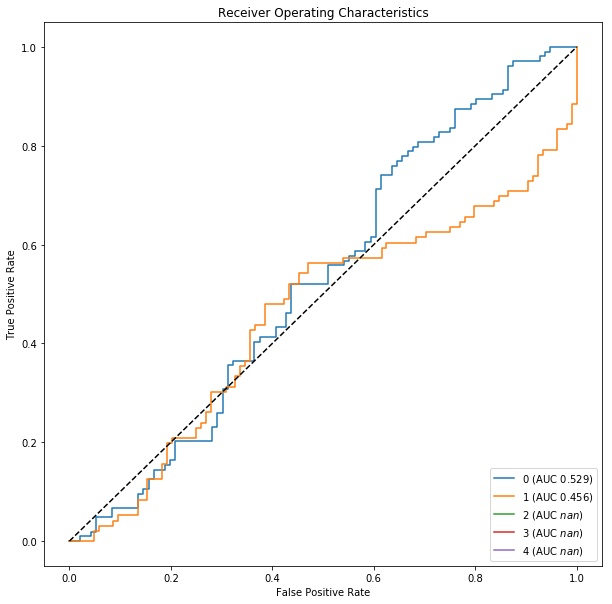

svm poly


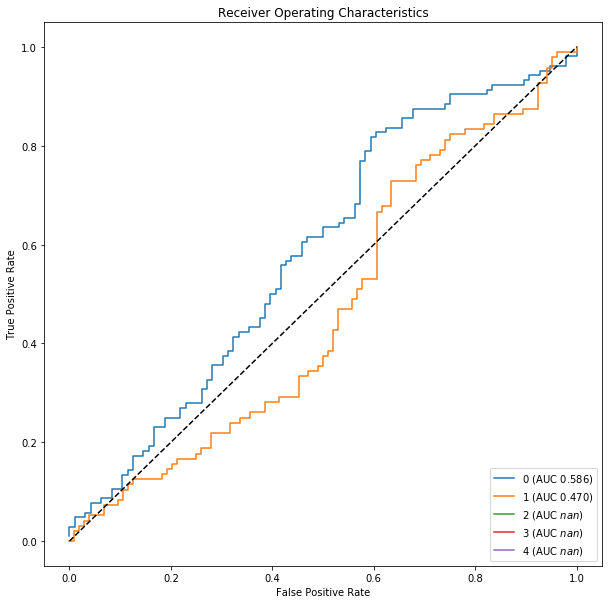

knn


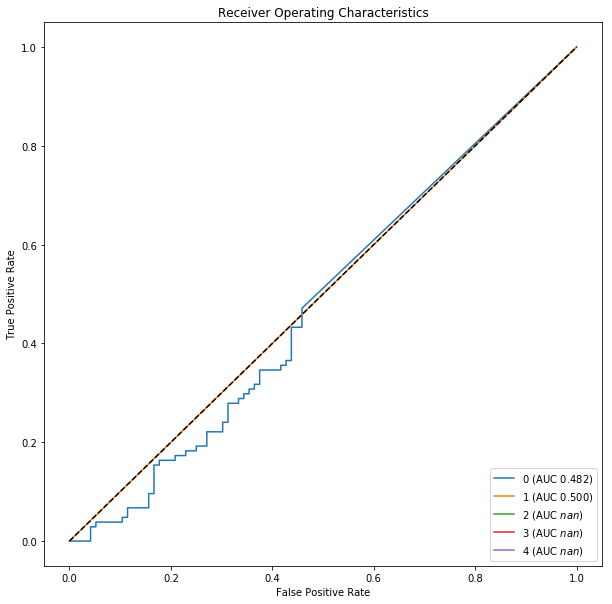

regression


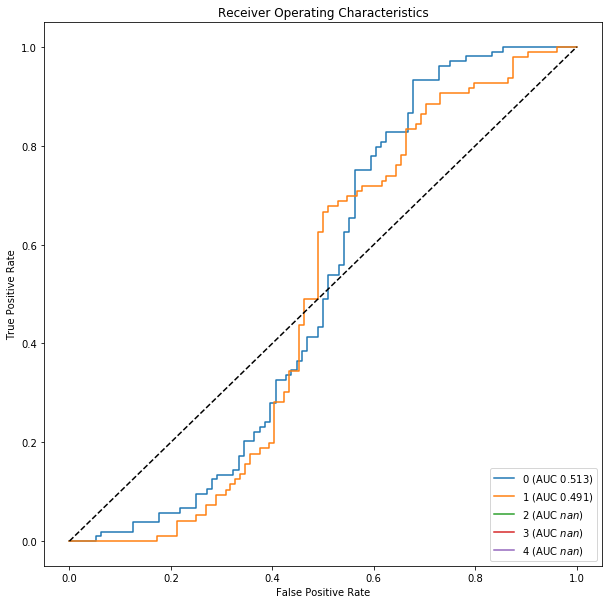

DT


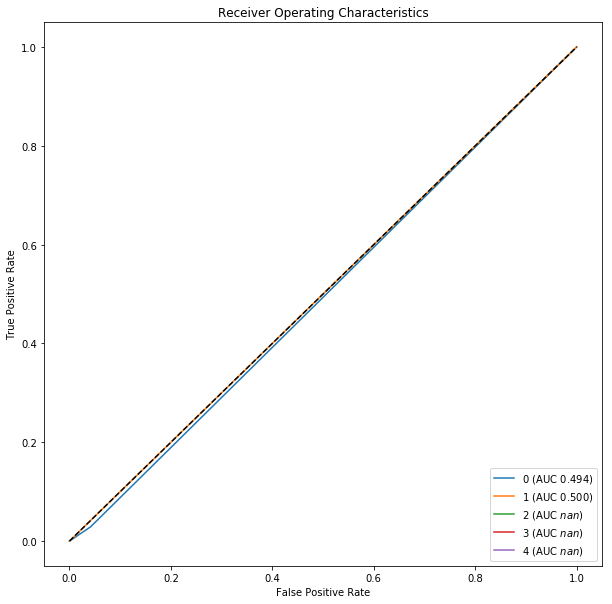

random forest


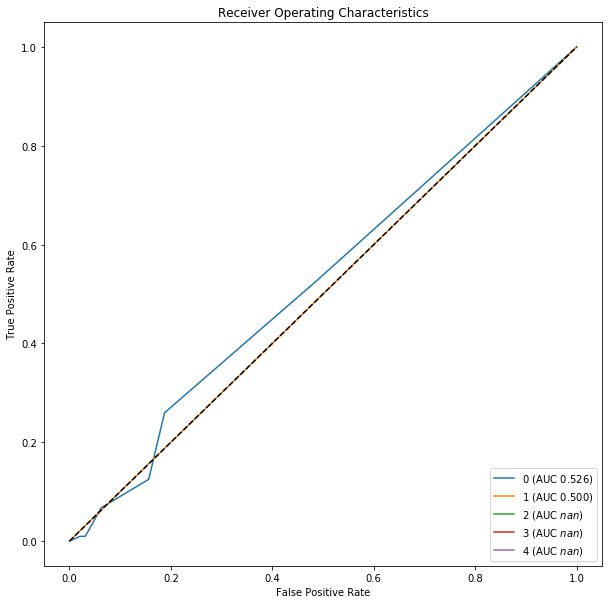

neural net


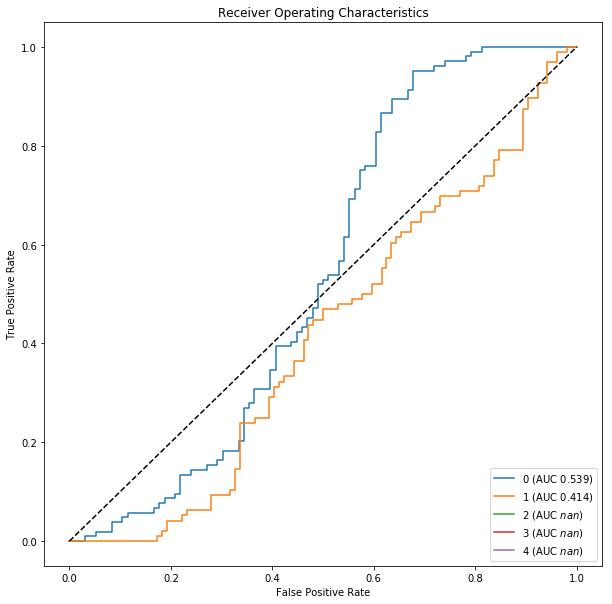

boost


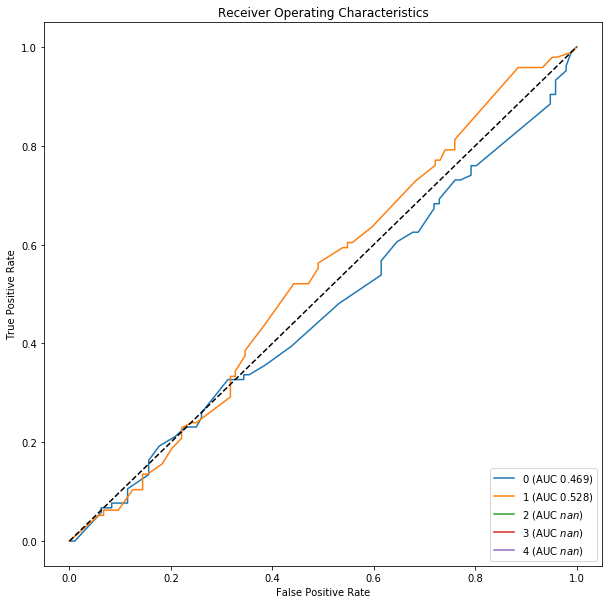




DF TEST 8

bayes


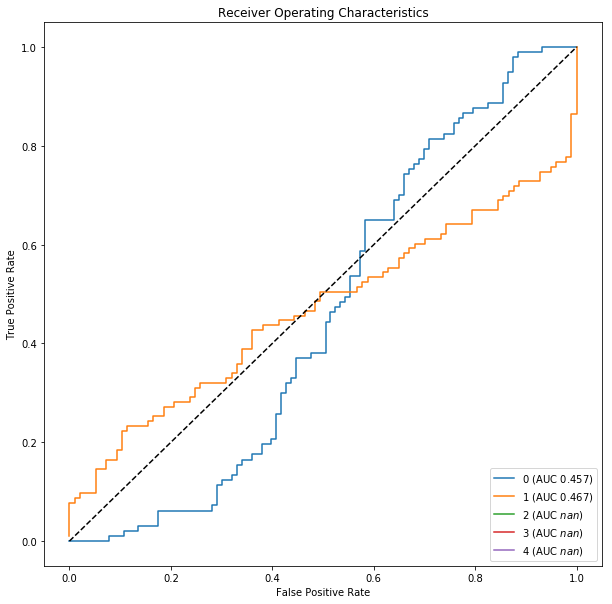

svm lin


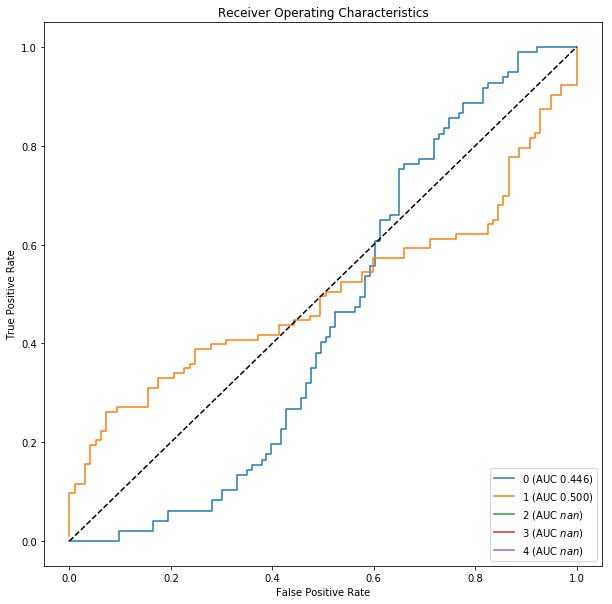

svm poly


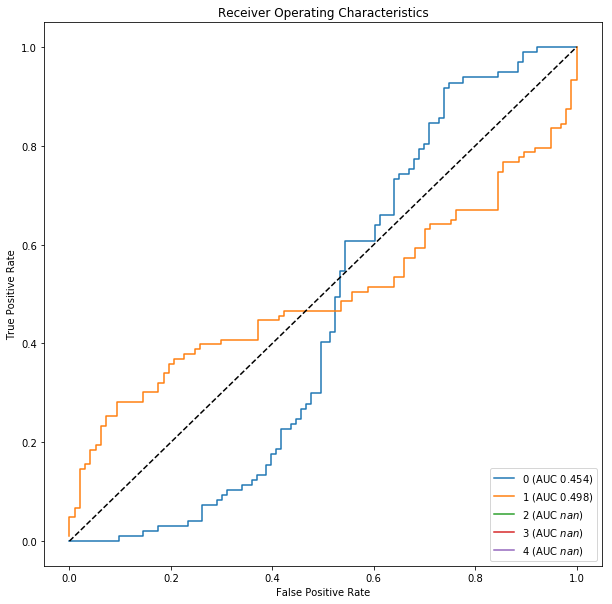

knn


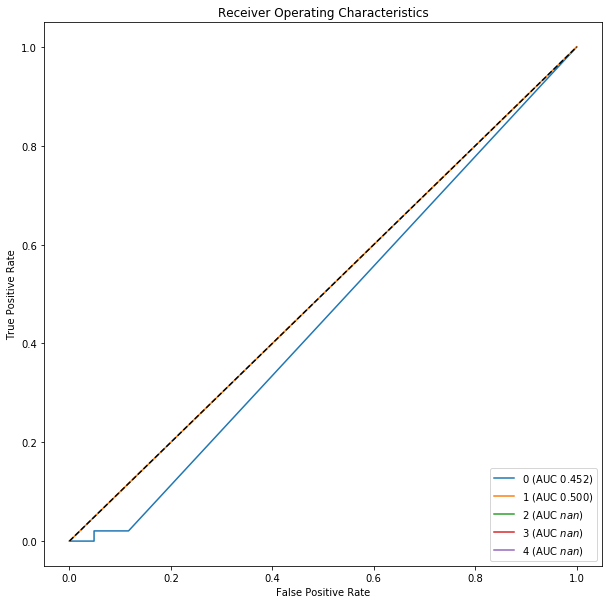

regression


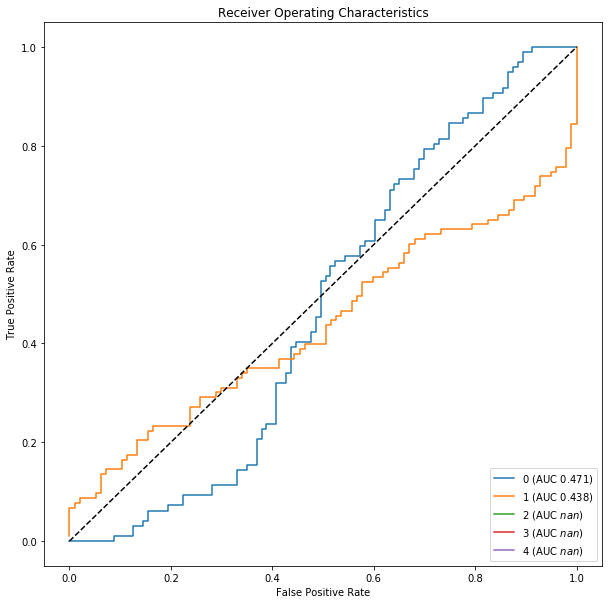

DT


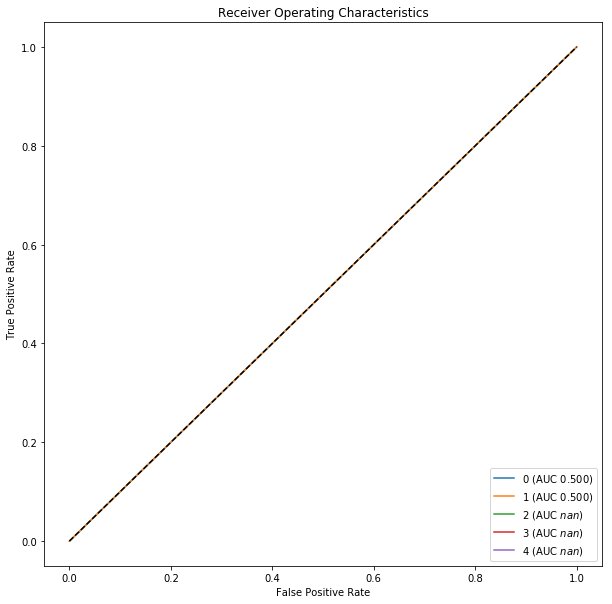

random forest


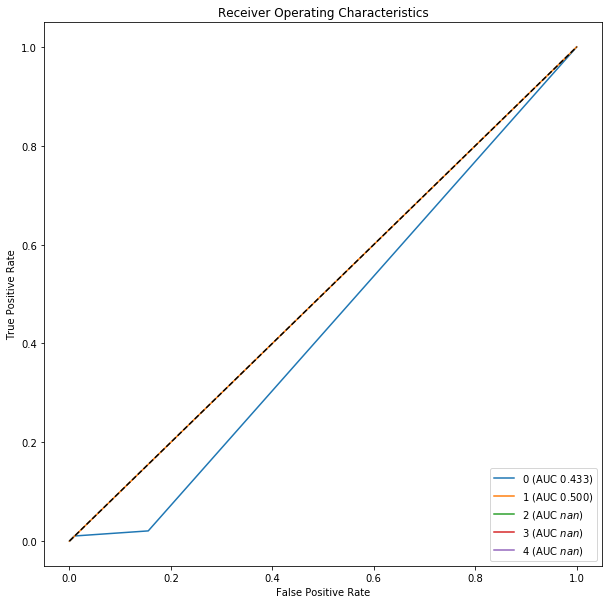

neural net


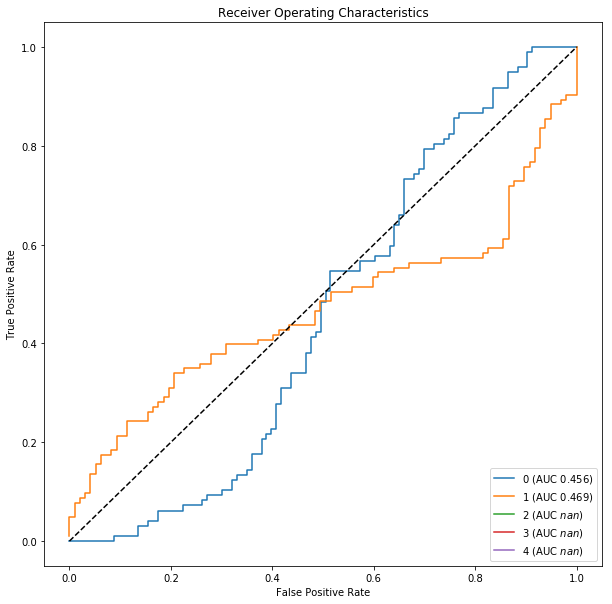

boost


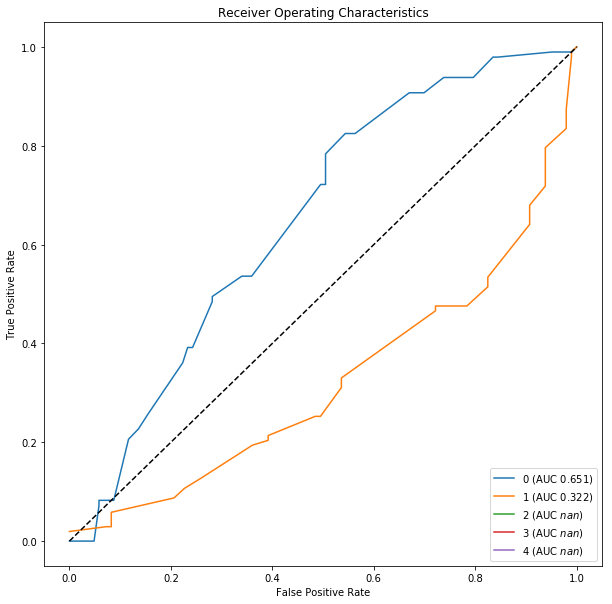




DF TEST 9

bayes


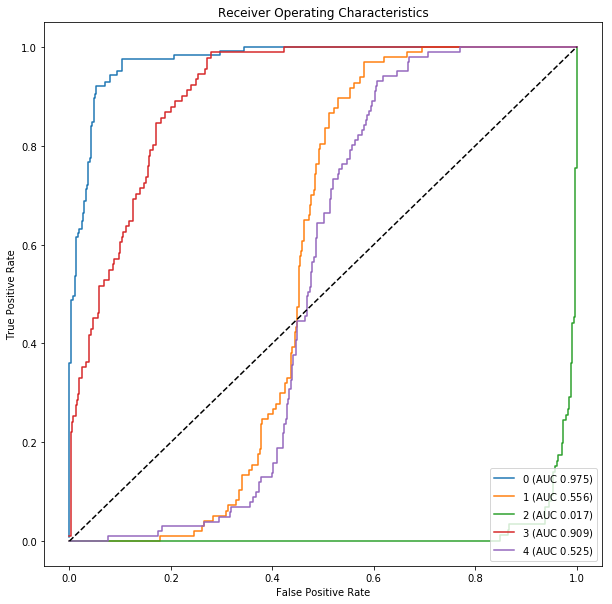

svm lin


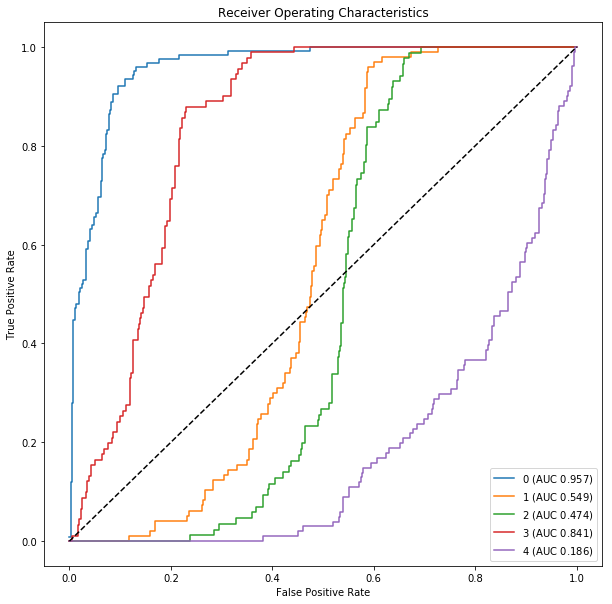

svm poly


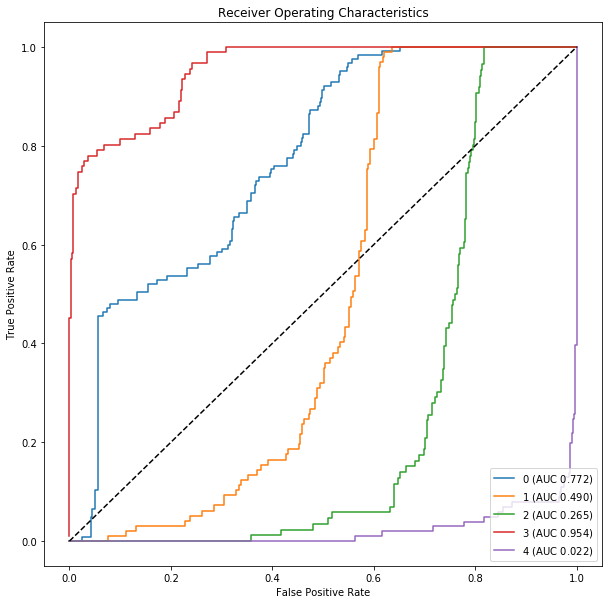

knn


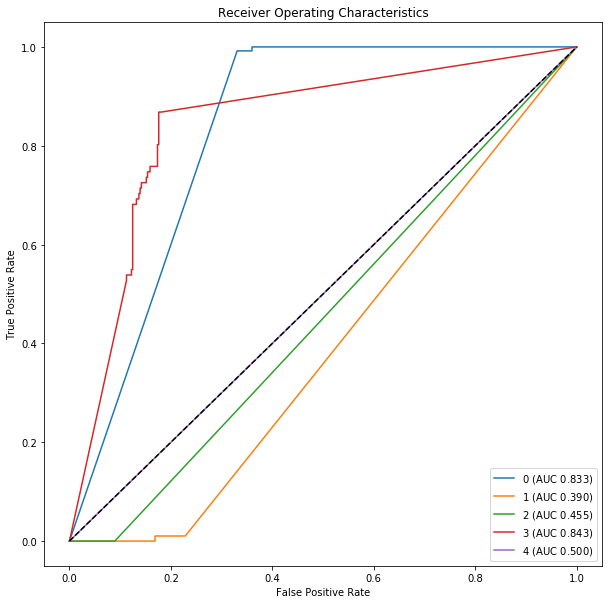

regression


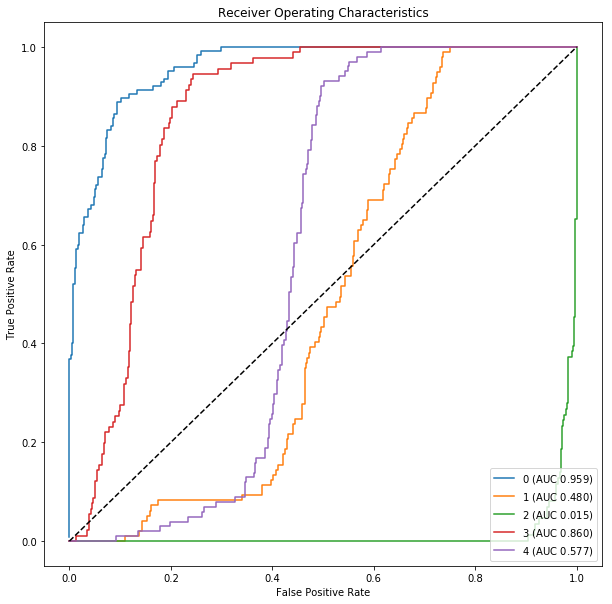

DT


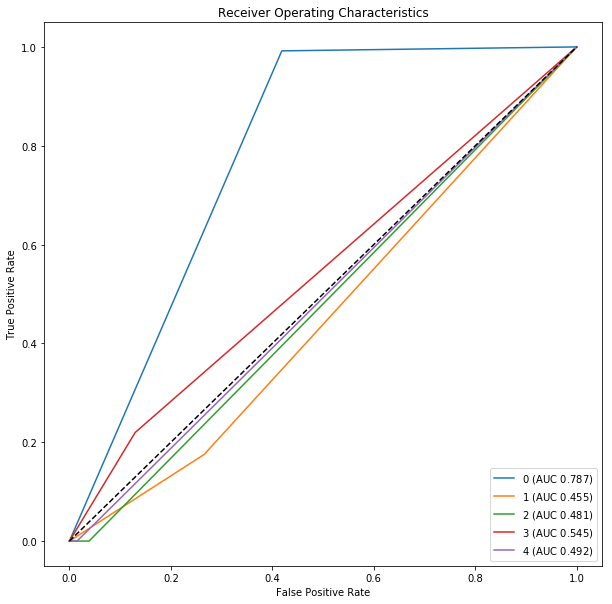

random forest


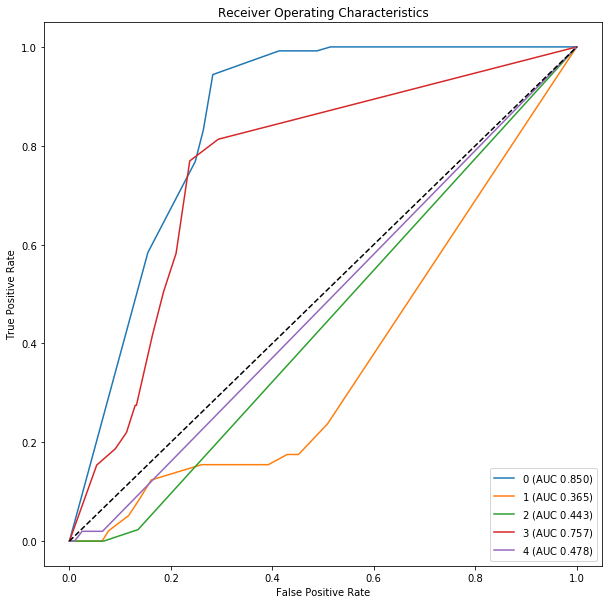

neural net


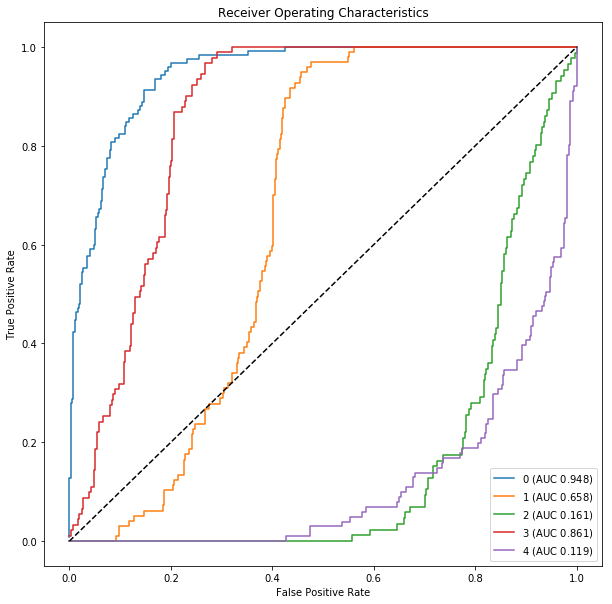

boost


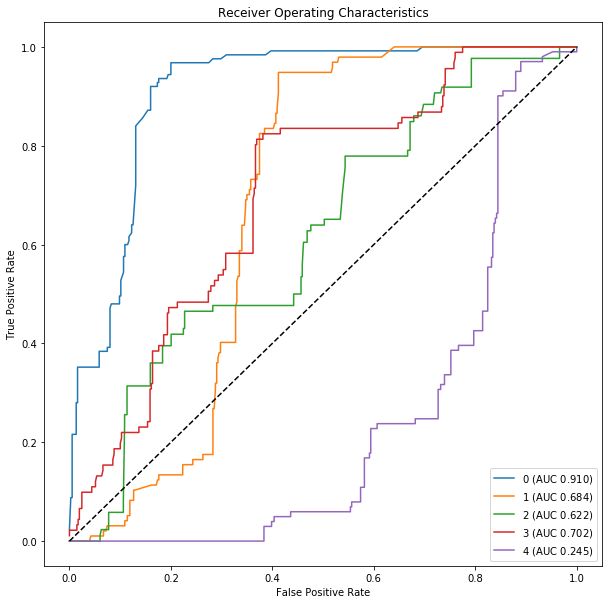




DF TEST 0

bayes


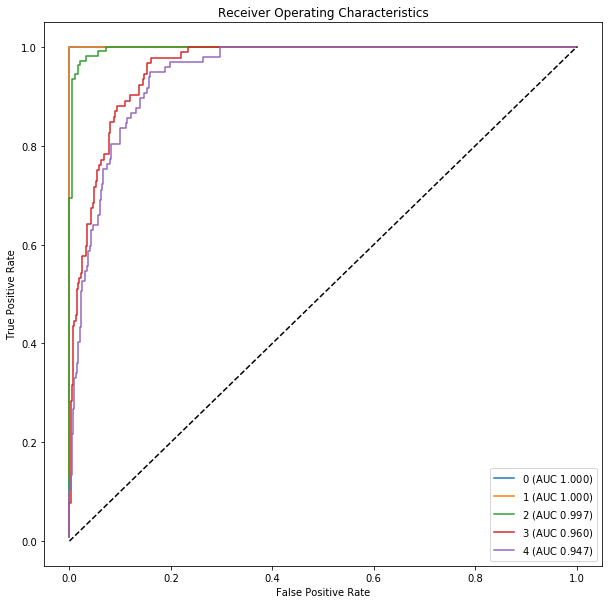

svm lin


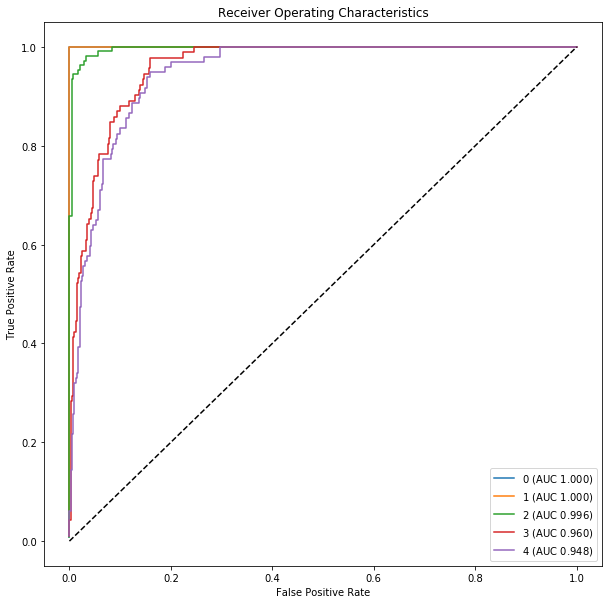

svm poly


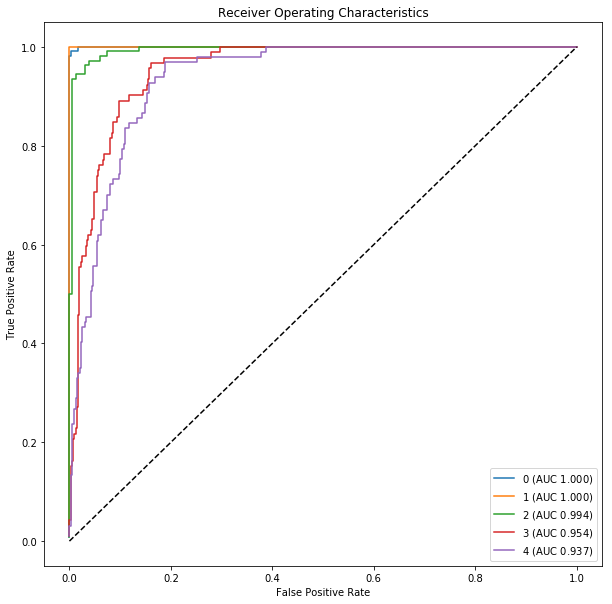

knn


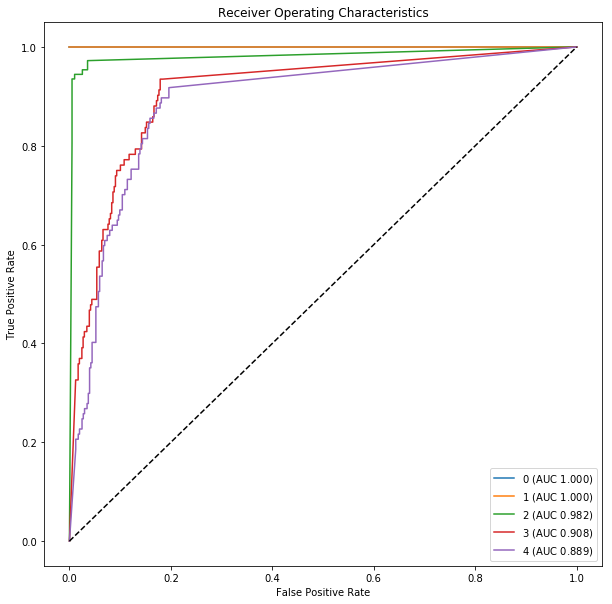

regression


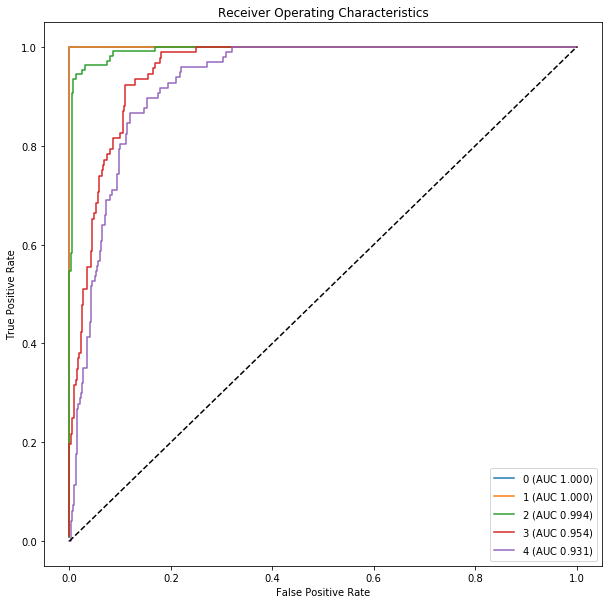

DT


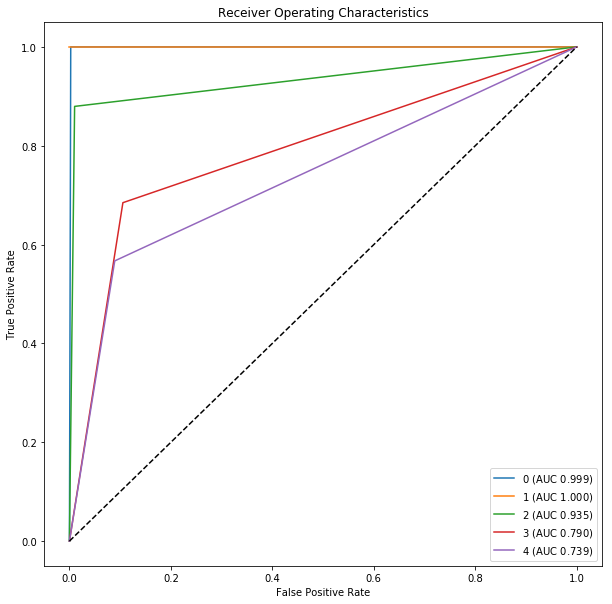

random forest


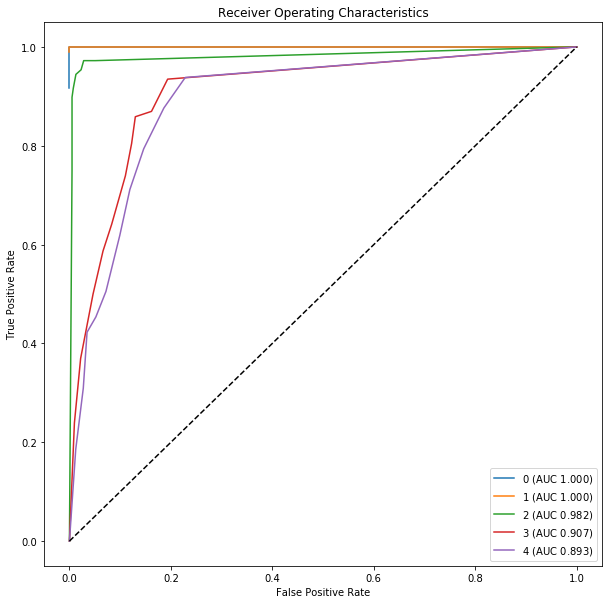

neural net


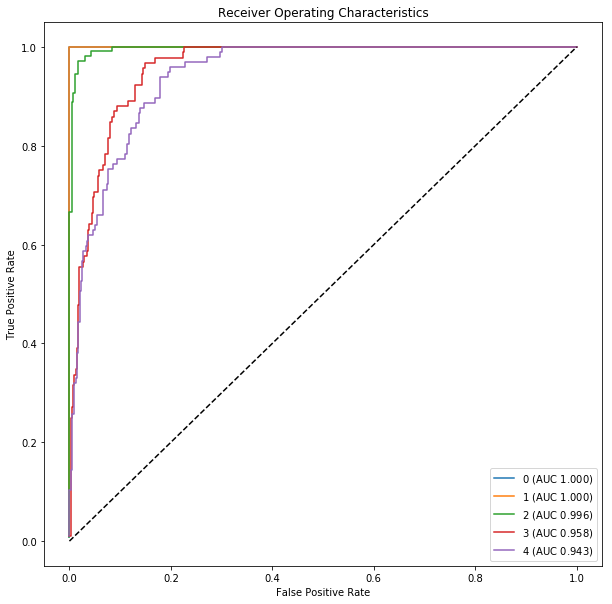

boost


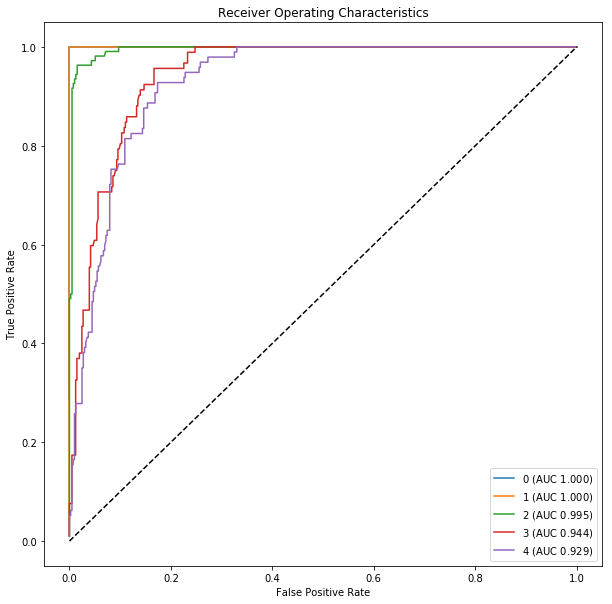

In [113]:
print('DF TEST 1')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest1)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest1)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest1)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest1)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest1)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest1)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest1)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest1)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest1)

print()
print()
print()

print('DF TEST 2')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest2)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest2)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest2)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest2)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest2)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest2)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest2)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest2)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest2)

print()
print()
print()

print('DF TEST 3')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest3)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest3)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest3)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest3)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest3)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest3)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest3)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest3)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest3)

print()
print()
print()

print('DF TEST 4')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest4)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest4)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest4)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest4)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest4)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest4)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest4)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest4)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest4)

print()
print()
print()

print('DF TEST 5')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest5)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest5)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest5)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest5)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest5)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest5)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest5)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest5)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest5)

print()
print()
print()

print('DF TEST 6')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest6)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest6)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest6)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest6)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest6)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest6)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest6)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest6)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest6)

print()
print()
print()

print('DF TEST 7')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest7)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest7)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest7)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest7)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest7)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest7)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest7)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest7)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest7)

print()
print()
print()

print('DF TEST 8')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest8)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest8)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest8)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest8)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest8)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest8)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest8)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest8)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest8)

print()
print()
print()

print('DF TEST 9')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest9)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest9)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest9)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest9)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest9)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest9)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest9)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest9)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest9)

print()
print()
print()

print('DF TEST 0')
print()
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest0)
print('svm lin')
lucem_illud.plotMultiROC(clf_anlin, dfTest0)
print('svm poly')
lucem_illud.plotMultiROC(clf_anpol, dfTest0)
print('knn')
lucem_illud.plotMultiROC(clf_anknn, dfTest0)
print('regression')
lucem_illud.plotMultiROC(clf_regre, dfTest0)
print('DT')
lucem_illud.plotMultiROC(clf_sytre, dfTest0)
print('random forest')
lucem_illud.plotMultiROC(clf_syfor, dfTest0)
print('neural net')
lucem_illud.plotMultiROC(clf_neune, dfTest0)
print('boost')
lucem_illud.plotMultiROC(clf_boost, dfTest0)

If we look at all the models within each dataset, it is possible to see that there are some datasets that adjust generally well to all models if we consider as a measure of it the area under the curve. I we look at the plots, though, this models dont seem to be performing very well in these data. The models that generally perform very well on the data are the ones applied over dataset 0 (dfTest0). The AUC are quite high, and the plots show low levels of false positive rates, with high levels of tru positive rates. This indicates that the models do way better when the data has 1) more categories, and 2) categories that are clearly defined in space. This seems quite obvious, though. I wonder, then, why the models are not doing very well in the other kinds of data

I know classify the real datasets that were given with all the methods shown:

In [102]:
dfTrain_news, dfTest_news = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
dfTrain_ssma, dfTest_ssma = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
dfTrain_slar, dfTest_slar = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
dfTrain_spam, dfTest_spam = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


For the Newsgroup data, it seems like the classifier that better adjusts to the data is the neuronal network model and the SVM linear model, while the one that uses a polynomial kernel function seems to not be doing a very good job.

In [306]:
clf_bayes.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_anlin.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_anpol.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_anknn.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_regre.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_sytre.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_syfor.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_neune.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])
clf_boost.fit(np.stack(dfTrain_news['vect'], axis=0), dfTrain_news['category'])

print('NEWSGROUP')
print('clf_bayes')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest_news))
print('clf_anlin')
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest_news))
print('clf_anpol')
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest_news))
print('clf_anknn')
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest_news))
print('clf_regre')
print(lucem_illud.evaluateClassifier(clf_regre, dfTest_news))
print('clf_sytre')
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest_news))
print('clf_syfor')
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest_news))
print('clf_neune')
print(lucem_illud.evaluateClassifier(clf_neune, dfTest_news))
print('clf_boost')
print(lucem_illud.evaluateClassifier(clf_boost, dfTest_news))

NEWSGROUP
clf_bayes
                            AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                    
comp.sys.mac.hardware  0.848784           0.574694    0.127660   0.661157   
comp.windows.x         0.924494           0.797107    0.059574   0.863248   
rec.autos              0.856126           0.701923    0.091489   0.851485   
misc.forsale           0.819700           0.658474    0.142553   0.793893   

                         Recall  
Category                         
comp.sys.mac.hardware  0.808081  
comp.windows.x         0.893805  
rec.autos              0.754386  
misc.forsale           0.722222  
clf_anlin
                            AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                    
comp.sys.mac.hardware  0.876419           0.720006    0.072340   0.857143   
comp.windows.x         0.935921           0.838190    0.046809   0.90265

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                            AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                    
comp.sys.mac.hardware  0.500000           0.210638    0.210638   0.000000   
comp.windows.x         0.579646           0.361420    0.202128   1.000000   
rec.autos              0.525281           0.252212    0.719149   0.252212   
misc.forsale           0.500000           0.306383    0.306383   0.000000   

                         Recall  
Category                         
comp.sys.mac.hardware  0.000000  
comp.windows.x         0.159292  
rec.autos              1.000000  
misc.forsale           0.000000  
clf_anknn
                            AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                    
comp.sys.mac.hardware  0.545073           0.232687    0.268085   0.309859   
comp.windows.x         0.594643           0.304941    0.257447   0.448718   
rec.autos      

For the Senate Small dataset, most classifiers seem to do a good job, except for the that uses a polynomial kernel function (is this because there are only two categories), and in part the naive bayes model. This is probably due to a correlation between the characterestics of both categories (which naive bayes assumes to be 0).  

In [115]:
clf_bayes.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_anlin.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_anpol.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_anknn.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_regre.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_sytre.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_syfor.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_neune.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])
clf_boost.fit(np.stack(dfTrain_ssma['vect'], axis=0), dfTrain_ssma['category'])

print('SENATE SMALL')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest_ssma))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest_ssma))

SENATE SMALL
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
Clinton   0.783311           0.801349    0.205279   0.838095  0.830189
Obama     0.783311           0.633762    0.205279   0.725191  0.736434
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
Clinton   0.992248           0.990654    0.005865   0.990654  1.000000
Obama     0.992248           0.990361    0.005865   1.000000  0.984496


/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                       
Clinton   0.5           0.621701    0.378299   0.621701     1.0
Obama     0.5           0.378299    0.378299   0.000000     0.0
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
Clinton   0.897049           0.900444    0.099707   0.927885  0.910377
Obama     0.897049           0.801463    0.099707   0.857143  0.883721
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
Clinton   0.984496           0.981481     0.01173   0.981481  1.000000
Obama     0.984496           0.980722     0.01173   1.000000  0.968992
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
Clinton   0.997642           0.998

For the large Senate dataset, again most classifiers do pretty well, except for the SVM polynomial one, and in part the naive bayes and in part the K neighbors classifiers (probably due to the spatial distribution of the data in the multidimensional space)

In [116]:
clf_bayes.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_anlin.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_anpol.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_anknn.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_regre.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_sytre.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_syfor.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_neune.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])
clf_boost.fit(np.stack(dfTrain_slar['vect'], axis=0), dfTrain_slar['category'])

print('SENATE LARGE')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest_slar))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest_slar))

SENATE LARGE
                AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                               
Kennedy    0.807747           0.679856    0.207692   0.696312  0.935860
Klobuchar  0.783956           0.557357    0.042308   0.906977  0.573529
Kerry      0.791916           0.576498    0.153846   0.725389  0.676329
Kyl        0.744538           0.521697    0.069231   0.924528  0.494949
Kohl       0.712194           0.431868    0.050000   0.900000  0.428571
                AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                               
Kennedy    0.967226           0.932566    0.034615   0.941341  0.982507
Klobuchar  0.985294           0.973152    0.002564   1.000000  0.970588
Kerry      0.965779           0.929293    0.023077   0.970149  0.942029
Kyl        0.984848           0.973543    0.003846   1.000000  0.969697
Kohl       0.968254           0.941636    0.005128 

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


           AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                        
Kennedy    0.5           0.439744    0.560256   0.439744     1.0
Klobuchar  0.5           0.087179    0.087179   0.000000     0.0
Kerry      0.5           0.265385    0.265385   0.000000     0.0
Kyl        0.5           0.126923    0.126923   0.000000     0.0
Kohl       0.5           0.080769    0.080769   0.000000     0.0
                AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                               
Kennedy    0.820333           0.695785    0.193590   0.713333  0.935860
Klobuchar  0.839268           0.607018    0.038462   0.839286  0.691176
Kerry      0.755356           0.556640    0.157692   0.776316  0.570048
Kyl        0.797891           0.592741    0.058974   0.895522  0.606061
Kohl       0.850169           0.607493    0.035897   0.818182  0.714286
                AUC  Average_Precision  E

For the email spam database, most classifiers dont do as well as they did in the senate data. The one that better adjusts to the data is neuronal network classifier. 

In [117]:
clf_bayes.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_anlin.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_anpol.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_anknn.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_regre.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_sytre.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_syfor.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_neune.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])
clf_boost.fit(np.stack(dfTrain_spam['vect'], axis=0), dfTrain_spam['category'])

print('EMAIL SPAM')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_anlin, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_anpol, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_anknn, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_regre, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_sytre, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_syfor, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_neune, dfTest_spam))
print(lucem_illud.evaluateClassifier(clf_boost, dfTest_spam))

EMAIL SPAM
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
spam      0.782626           0.363834    0.181287   0.441860  0.730769
not spam  0.782626           0.929198    0.181287   0.945312  0.834483
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
spam      0.761472           0.534081    0.083333   0.861538  0.538462
not spam  0.761472           0.921300    0.083333   0.922456  0.984483


/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          AUC  Average_Precision  Error_Rate  Precision  Recall
Category                                                       
spam      0.5           0.152047    0.152047   0.000000     0.0
not spam  0.5           0.847953    0.152047   0.847953     1.0
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
spam      0.730537           0.445274    0.102339   0.750000  0.490385
not spam  0.730537           0.912026    0.102339   0.913961  0.970690
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
spam      0.627221           0.346227    0.116959   0.900000  0.259615
not spam  0.627221           0.882086    0.116959   0.882263  0.994828
               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
spam      0.763329           0.492

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [118]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [119]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [120]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: nltk.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

Let's split the data into training data and testing data.

In [121]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [122]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud.generateVecs()` will help with this but for now we are doing it the long way):

In [123]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [124]:
TFVects.shape

(1368, 11423)

We can save this in the dataframe to make things easier

In [125]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [126]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [127]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

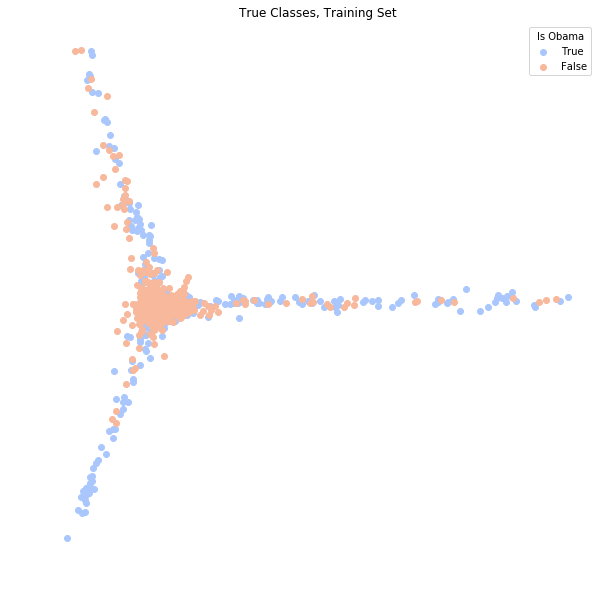

In [128]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

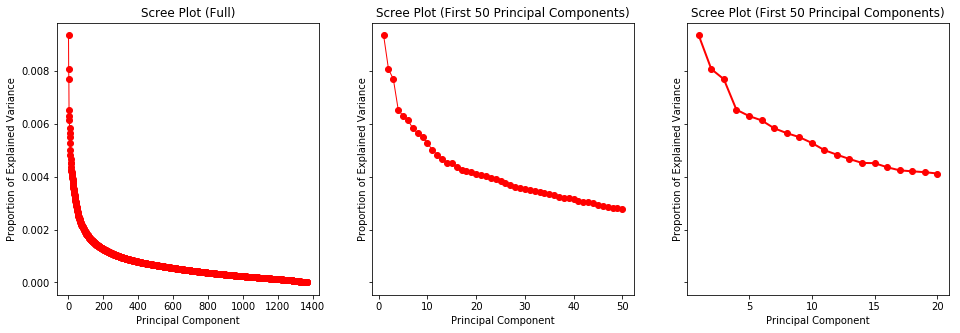

In [129]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [130]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [131]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [132]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6710526315789473

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [133]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6129032258064516

Slightly poorer. How about using more dimensions (40)?

In [134]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7456140350877193
Testing:
0.6891495601173021


Or still more (100)?

In [135]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8296783625730995
Testing:
0.7741935483870968


Or even more (200)!

In [136]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8713450292397661
Testing:
0.8123167155425219


This is becoming ridiculous (400)!

In [137]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9115497076023392
Testing:
0.8299120234604106


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [138]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.8135964912280702


Train the model using training data, and then test it on the testing data.

In [139]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.7653958944281525


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [140]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [141]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9649122807017544
Testing:
0.873900293255132


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [142]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [143]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

0.8840579710144928

Recall:

In [144]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

0.8187919463087249

F1-measure:

In [145]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

0.8501742160278746

Let's take a look at how well our posterior distribution looks relative to the truth.

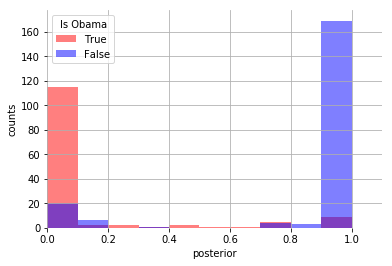

In [146]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [147]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

Clinton  Clinton_log_prob         Obama  Obama_log_prob
0        dick         -1.776175      welcomed       -2.229014
1         amy         -1.797009  announcement       -2.288912
2    brundage         -1.873549        island       -2.313913
3     chicago         -2.046821        ground       -2.326652
4   temporary         -2.146193            fy       -2.352628
5   political         -2.192003        urging       -2.352628
6          va         -2.192003         urban       -2.365873
7    location         -2.240012          read       -2.392902
8     quickly         -2.240012         honor       -2.406695
9    reported         -2.256541       welcome       -2.406695
10        oil         -2.307834         class       -2.420681
11     reform         -2.325534    supporting       -2.420681
12    richard         -2.325534         urged       -2.420681
13  oversight         -2.343553  construction       -2.434866
14    dirksen         -2.361902       growing       -2.449254

## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [148]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [149]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [150]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: nltk.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [151]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [152]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [153]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [154]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [155]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8961114335461404


In [156]:
train_ng_df[['category', 'nb_predict']][:10]

category              nb_predict
1933           comp.graphics               sci.space
1890           comp.graphics           comp.graphics
1183               sci.space               sci.space
208       talk.religion.misc      talk.religion.misc
527   soc.religion.christian  soc.religion.christian
1136               sci.space               sci.space
19        talk.religion.misc  soc.religion.christian
161       talk.religion.misc  soc.religion.christian
547   soc.religion.christian  soc.religion.christian
167       talk.religion.misc  soc.religion.christian

Looks pretty good, lets examine the testing dataset:

In [157]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.7837209302325582


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

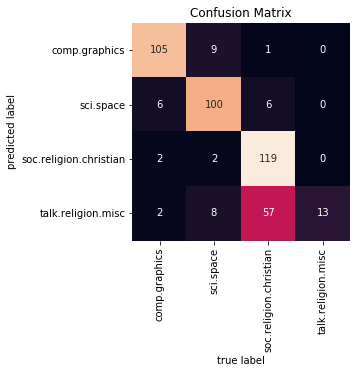

In [158]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [159]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.9079332104367556
0.7837209302325582
0.8232512673622951


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [160]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                     
soc.religion.christian  0.879505           0.638428    0.158140   0.650273   
talk.religion.misc      0.581250           0.318314    0.155814   1.000000   
comp.graphics           0.940649           0.856904    0.046512   0.913043   
sci.space               0.916554           0.778207    0.072093   0.840336   

                          Recall  
Category                          
soc.religion.christian  0.967480  
talk.religion.misc      0.162500  
comp.graphics           0.913043  
sci.space               0.892857

We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

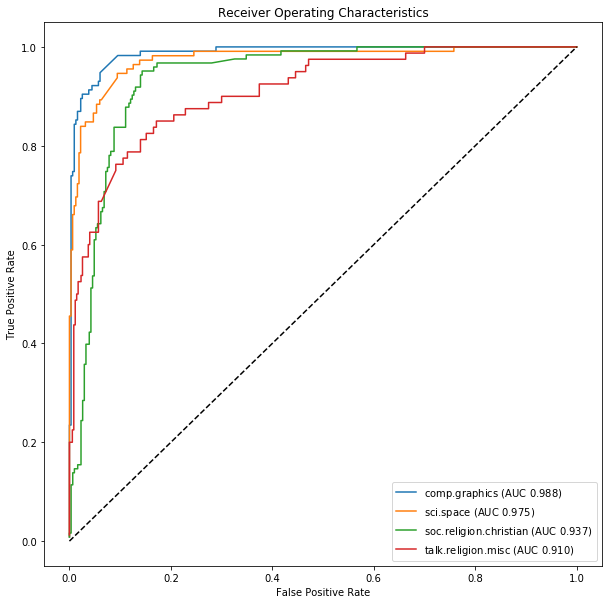

In [161]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

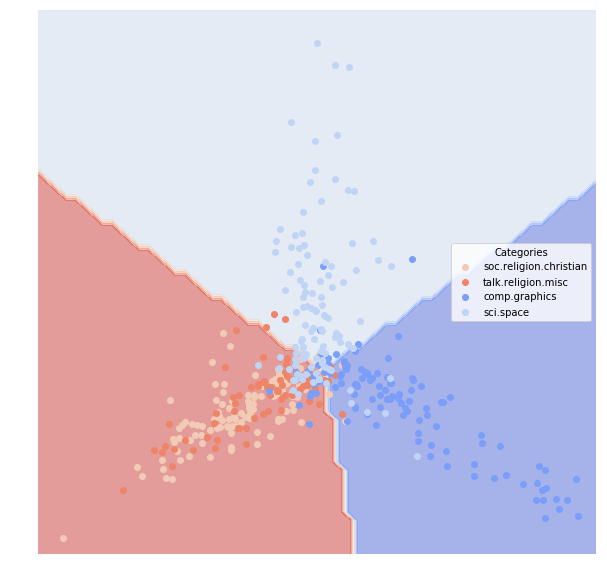

In [162]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

We can also give the model a new string, not present in our data, and use the *predict* method to see if it can assign it to a category. Using our model to extend its classifications to new, uncoded data might be the primary purpose of a social science application. The words do have to be in the vocabulary, so don't be too creative :-)

In [163]:
def predict_category(s, model, tfidf): #We just define a simple function here
    a = np.zeros((1, len(tfidf.vocabulary_)))
    for w in nltk.word_tokenize(s):
        try:
            a[:,tfidf.vocabulary_[lucem_illud.stemmer_basic.stem(w.lower())]] = 1
        except KeyError:
            print("Warning: '{}' not in vocabulary".format(w))
    return model.predict(a)[0]

In [164]:
predict_category('rockets are cool', MultinomialNB_ng, TFVectorizer_ng)

'sci.space'

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [200]:
s097 = pandas.read_csv('../data/speeches_097.txt', sep='|', encoding='cp437',  error_bad_lines=False)
s097_sub = s097.sample(frac=0.05)
s097_sub[1:5]

b'Skipping line 4272: expected 2 fields, saw 3\nSkipping line 20062: expected 2 fields, saw 3\nSkipping line 42382: expected 2 fields, saw 3\nSkipping line 128329: expected 2 fields, saw 3\nSkipping line 184070: expected 2 fields, saw 3\nSkipping line 198827: expected 2 fields, saw 3\n'


speech_id                                             speech
32188   970032191                     Mr. Speaker. I offer a motion.
122946  970123097                                There has not been.
97862   970098013                             Mr. Speaker. I object.
6920    970006922  Mr. President. I trust I may be forgiven if I ...

In [199]:
s097_map = pandas.read_csv('../data/097_SpeakerMap.txt', sep='|', encoding='cp437',  error_bad_lines=False)
s097_map[1:5]

speakerid  speech_id    lastname firstname chamber state gender party  \
1   97105071  970000006  HUDDLESTON    WALTER       S    KY      M     D   
2   97106761  970000007     JACKSON     HENRY       S    WA      M     D   
3   97106981  970000008    STAFFORD    ROBERT       S    VT      M     R   
4   97104811  970000010       BAKER    HOWARD       S    TN      M     R   

   district nonvoting  
1       NaN    voting  
2       NaN    voting  
3       NaN    voting  
4       NaN    voting

In [201]:
s097_sub = pandas.merge(s097_map, s097_sub, how='inner', on='speech_id',validate='one_to_many')
s097_sub[1:5]

speakerid  speech_id  lastname firstname chamber state gender party  \
1   97104811  970000050     BAKER    HOWARD       S    TN      M     R   
2   97107681  970000066  CRANSTON      ALAN       S    CA      M     D   
3   97104811  970000131     BAKER    HOWARD       S    TN      M     R   
4   97108071  970000136   BENTSEN     LLOYD       S    TX      M     D   

   district nonvoting                                             speech  
1       NaN    voting  Mr. President. I send to the desk a resolution...  
2       NaN    voting  Mr. President. I send a resolution to the desk...  
3       NaN    voting                    I yield to the minority leader.  
4       NaN    voting             Will the Senator yield for a question?

In [202]:
s097_sub['tokenized_text'] = s097_sub['speech'].apply(lambda x: nltk.word_tokenize(x))
s097_sub['normalized_text'] = s097_sub['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [204]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(s097_sub, holdBackFraction=holdBackFraction)

In [206]:
print(len(train_data_df))
print(len(test_data_df))

8092
2023


In [208]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['speech'])

In [209]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [210]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [211]:
train_data_df['pca'] = [r for r in reduced_data]

In [216]:
import numpy as np

train_data_df['democrat'] = np.where(train_data_df['party']=='D', 1, 0)
train_data_df

speakerid  speech_id       lastname  firstname chamber state gender  \
6268   97106251  970205068      MATTINGLY       MACK       S    GA      M   
7513   97109141  970243162       HATFIELD       MARK       S    OR      M   
1287   97106960  970043515         SAWYER     HAROLD       H    MI      M   
8045   97121310  970259822  SENSENBRENNER         F.       H    WI      M   
2364   97105640  970078838          BEARD      ROBIN       H    TN      M   
5053   97111120  970166906        EMERSON    NORVELL       H    MO      M   
4322   97108781  970142773        BRADLEY    WILLIAM       S    NJ      M   
1302   97111891  970044182          HELMS      JESSE       S    NC      M   
1027   97107630  970035297          BONER    WILLIAM       H    TN      M   
5024   97105451  970166011          TOWER       JOHN       S    TX      M   
5991   97106241  970196687        MATHIAS    CHARLES       S    MD      M   
2978   97118171  970099053          HATCH      ORRIN       S    UT      M   
7319   97109350  970237084         LEHMAN    WILLIAM       H    FL      M   
7917   97109890  970255799          UDALL     MORRIS       H    AZ      M   
4525   97108181  970149696       DANFORTH       JOHN       S    MO      M   
1794   97113281  970060569       SARBANES       PAUL       S    MD      M   
2707   97110661  970090215       PACKWOOD     ROBERT       S    OR      M   
9060   97114621  970151218           BYRD     ROBERT       S    WV      M   
3335   97107031  970110424        WEICKER     LOWELL       S    CT      M   
1341   97107230  970045236          FUQUA        DON       H    FL      M   
5819   97107980  970191261       STRATTON     SAMUEL       H    NY      M   
1259   97105760  970042945         BUTLER     MANLEY       H    VA      M   
4967   97111120  970164530        EMERSON    NORVELL       H    MO      M   
2918   97108970  970097303        DYMALLY     MERVYN       H    CA      M   
7757   97109890  970250727          UDALL     MORRIS       H    AZ      M   
9422   97109271  970162964       JOHNSTON       JOHN       S    LA      M   
4700   97107391  970156358        MCCLURE      JAMES       S    ID      M   
515    97105911  970017571       EAGLETON     THOMAS       S    MO      M   
8616   97111891  970276994          HELMS      JESSE       S    NC      M   
8978   97114621  970073065           BYRD     ROBERT       S    WV      M   
...         ...        ...            ...        ...     ...   ...    ...   
3541   97108880  970117179          CONTE     SILVIO       H    MA      M   
3170   97108121  970105365        BURDICK    QUENTIN       S    ND      M   
2069   97107101  970068560      ARMSTRONG    WILLIAM       S    CO      M   
7537   97104561  970243883        SCHMITT   HARRISON       S    NM      M   
5143   97106000  970169755        FENWICK  MILLICENT       H    NJ      F   
7717   97113020  970249549         GILMAN   BENJAMIN       H    NY      M   
4124   97104811  970135715          BAKER     HOWARD       S    TN      M   
6277   97110161  970205216           DOLE     ROBERT       S    KS      M   
6891   97113601  970224148       DOMENICI       PETE       S    NM      M   
9890   97110170  970247349        EDWARDS    WILLIAM       H    CA      M   
4112   97104811  970135304          BAKER     HOWARD       S    TN      M   
5200   97107970  970171519    ST. GERMAIN    FERNAND       H    RI      M   
968    97109141  970033675       HATFIELD       MARK       S    OR      M   
1726   97110161  970058036           DOLE     ROBERT       S    KS      M   
867    97109651  970030004          PRYOR      DAVID       S    AR      M   
2453   97106690  970081507       FORSYTHE      EDWIN       H    NJ      M   
7550   97104811  970244184          BAKER     HOWARD       S    TN      M   
4198   97105880  970138335      DERWINSKI     EDWARD       H    IL      M   
6035   97110610  970198328         MICHEL     ROBERT       H    IL      M   
1191   97106360  970040986      RAILSBACK     THOMAS       H    IL      M   
42

In [235]:
test_data_df['democrat'] = np.where(test_data_df['party']=='D', 1, 0)
test_data_df

speakerid  speech_id         lastname  firstname chamber state gender  \
6834    97109610  970222502            PEASE     DONALD       H    OH      M   
9156    97114621  970251088             BYRD     ROBERT       S    WV      M   
1836    97106610  970061847         CORCORAN     THOMAS       H    IL      M   
2149    97110670  970071794          PANETTA       LEON       H    CA      M   
3184    97104811  970105953            BAKER     HOWARD       S    TN      M   
6336    97114941  970206689          KENNEDY     EDWARD       S    MA      M   
5315    97106790  970175276          LEVITAS    ELLIOTT       H    GA      M   
6932    97107131  970225554        BOSCHWITZ    RUDOLPH       S    MN      M   
1790    97108771  970060419            BOREN      DAVID       S    OK      M   
3926    97111021  970128962           CHAFEE       JOHN       S    RI      M   
5087    97108301  970168121            HEINZ      HENRY       S    PA      M   
4853    97107450  970160968           ONEILL     THOMAS       H    MA      M   
1859    97110161  970062539             DOLE     ROBERT       S    KS      M   
4956    97106620  970164228  CORRADA-DEL RIO   BALTASAR       H    PR      M   
813     97110890  970027940          WHITTEN      JAMIE       H    MS      M   
5443    97111540  970178883        SCHROEDER   PATRICIA       H    CO      F   
8060    97114511  970260244          SPECTER      ARLEN       S    PA      M   
7338    97117351  970237603           BAUCUS        MAX       S    MT      M   
1189    97116800  970040909            FRANK     BARNEY       H    MA      M   
3636    97104811  970119903            BAKER     HOWARD       S    TN      M   
2338    97106040  970077968             GINN     RONALD       H    GA      M   
533     97111410  970018448       MONTGOMERY  GILLESPIE       H    MS      M   
2599    97108410  970086454         MOLINARI        GUY       H    NY      M   
9495    97108290  970215888          HAWKINS   AUGUSTUS       H    CA      M   
907     97107330  970031405         KINDNESS     THOMAS       H    OH      M   
3151    97112531  970104713         HOLLINGS     ERNEST       S    SC      M   
7047    97109190  970229094          HOPKINS      LARRY       H    KY      M   
8663    97104811  970278599            BAKER     HOWARD       S    TN      M   
4958    97107470  970164298       SEIBERLING       JOHN       H    OH      M   
2914    97110010  970097255            ASPIN     LESLIE       H    WI      M   
...          ...        ...              ...        ...     ...   ...    ...   
462     97110161  970015740             DOLE     ROBERT       S    KS      M   
465     97108471  970015898           RIEGLE     DONALD       S    MI      M   
4153    97106591  970136720           CHILES     LAWTON       S    FL      M   
4678    97104811  970155459            BAKER     HOWARD       S    TN      M   
2680    97114240  970089232             HYDE      HENRY       H    IL      M   
9860    97106800  970228236             LONG   CLARENCE       H    MD      M   
2138    97111300  970071253           JACOBS     ANDREW       H    IN      M   
7129    97111870  970231359         HAMILTON        LEE       H    IN      M   
9811    97107320  970183035            JONES      JAMES       H    OK      M   
7706    97104561  970249185          SCHMITT   HARRISON       S    NM      M   
10105   97114621  970233222             BYRD     ROBERT       S    WV      M   
6505    97107980  970211638         STRATTON     SAMUEL       H    NY      M   
2082    97108071  970068803          BENTSEN      LLOYD       S    TX      M   
3970    97106921  970130313         PROXMIRE    WILLIAM       S    WI      M   
723     97111770  970025062          DELLUMS     RONALD       H    CA      M   
9350    97107731  970128260            DIXON       ALAN       S    IL      M   
363     97110131  970012720           DAMATO    ALFONSE       S    NY      M   
8289    97109161  970267888           HEFLIN     HOWELL       S    AL      M   
9932   

In [219]:
#fig, ax = plt.subplots(figsize = (10,10))
#ax.axis('off')
#pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)
#
##Plot Democrat
#a = np.stack(train_data_df[train_data_df['democrat']]['pca'])
#ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")
#
##Plot Republican
#a = np.stack(train_data_df[train_data_df['democrat'].eq(False)]['pca'])
#ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
#    
#ax.legend(loc = 'upper right', title = 'Democrat')
#plt.title('True Classes, Training Set')
#plt.show()

I choose the first 4 pricipal components as covariates to fit the logistic regression model.

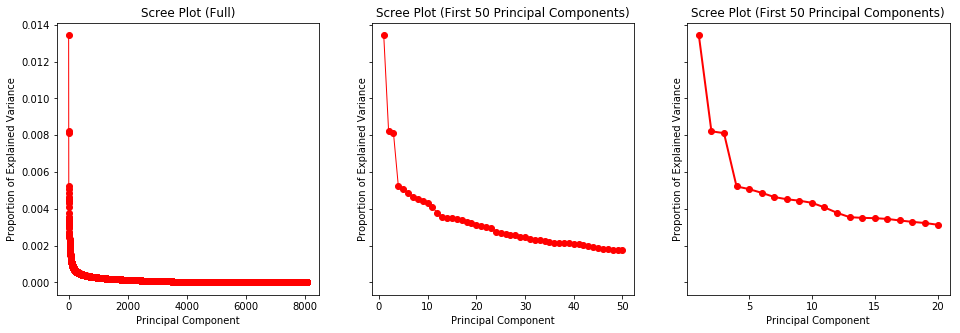

In [220]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [221]:
train_data_df['pca_reduced_4'] = train_data_df['pca'].apply(lambda x: x[:4])

In [222]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_4'], axis=0), train_data_df['party'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [223]:
logistic.score(np.stack(train_data_df['pca_reduced_4'], axis=0), train_data_df['party'])

0.5380622837370242

It seems like the model has only 54% accuracy. Because of this, I also try a  logistic regression that uses the TF-IDF scores for each word. Accuracy raises to 61%. Still not that good. 

In [224]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['party'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['party']))

0.6085022244191794


Naive Bayes seems to have even less accuracy than the logistic regression model. There is a lot of false democratas overlapping the true ones. Basically, the model is TERRIBLE for the data.

In [253]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['speech'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_4'] = test_data_df['pca'].apply(lambda x: x[:4])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_4'], axis=0), test_data_df['party'])

0.5210084033613446

In [254]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['party']))

0.5491843796342066


In [257]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['democrat'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [258]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['democrat']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['democrat']))

Training:
0.6234552644587247
Testing:
0.5506673257538309


In [230]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [241]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['party'], average = None)

array([0.22419187, 0.        , 0.        , 0.83776091])

In [244]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['party'], average=None)

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([0.56728232, 0.        , 0.        , 0.54472548])

In [247]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['party'], average=None)

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([0.32137519, 0.        , 0.        , 0.66018692])

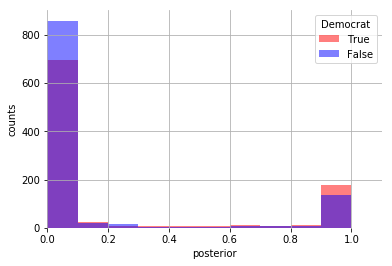

In [256]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['democrat'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['democrat'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Democrat")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The words that make each group more distinctive do not say too much. Could it be that in 1981 congress speech did not differ much between speakers of one party and the other?

In [259]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Democrat' : [],
    'Democrat_log_prob' : [],
    'Republican' : [],
    'Republican_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Democrat'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Democrat_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Republican'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Republican_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

Democrat  Democrat_log_prob  Republican  Republican_log_prob
0      rescinded          -4.141092       women            -3.980629
1       calendar          -4.184894       value            -4.040349
2         recess          -4.230704       month            -4.103862
3        discuss          -4.312050   operating            -4.103862
4          occur          -4.312050   estimates            -4.120391
5     statements          -4.312050       gives            -4.120391
6           room          -4.329144      giving            -4.120391
7        chamber          -4.346536      likely            -4.120391
8          maybe          -4.346536        1978            -4.137198
9       remember          -4.364235        post            -4.137198
10  supplemental          -4.364235  businesses            -4.154293
11     addressed          -4.382254       death            -4.154293
12     excellent          -4.382254   extremely            -4.154293
13     obviously          -4.382254     minimum            -4.154293
14      withdraw          -4.382254     realize            -4.154293

I aslo do a model of multinomial naive bayes, which works terrible. I try to predict the state of the congressperson who is talking. Apparently, though, there aren't many differences between them, and the model tends to predict that everyone is from Tennessee.

In [261]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['state'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [262]:
train_data_df['nb_predict_multi'] = MultinomialNB_ng.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_data_df['vect'], axis=0), train_data_df['state']))

Training score:
0.2139149777558082


In [263]:
train_data_df[['state', 'nb_predict_multi']][:10]

state nb_predict_multi
6268    GA               IL
7513    OR               TN
1287    MI               TN
8045    WI               NY
2364    TN               NY
5053    MO               TN
4322    NJ               TN
1302    NC               TN
1027    TN               TN
5024    TX               TN

In [266]:
#Add to df
test_data_df['nb_predict_multi'] = MultinomialNB_ng.predict(np.stack(test_data_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_data_df['vect'], axis=0), test_data_df['state']))

Testing score:
0.11319822046465645


In [267]:
test_data_df['category'] = test_data_df['state']

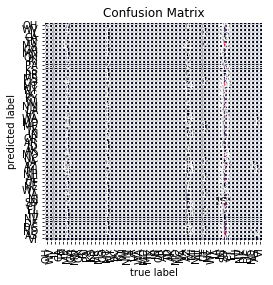

In [268]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_data_df)

In [269]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_data_df)

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
NM        0.500000           0.021256    0.021256   0.000000  0.000000
KY        0.500000           0.013347    0.013347   0.000000  0.000000
MA        0.500000           0.029165    0.029165   0.000000  0.000000
FL        0.500000           0.014335    0.014335   0.000000  0.000000
AK        0.517857           0.062407    0.026693   1.000000  0.035714
OK        0.500000           0.013841    0.013841   0.000000  0.000000
UT        0.500000           0.010875    0.010875   0.000000  0.000000
IL        0.514534           0.057540    0.083539   0.097222  0.063063
MN        0.500000           0.013841    0.013841   0.000000  0.000000
SC        0.500000           0.017795    0.017795   0.000000  0.000000
OH        0.506951           0.037600    0.033613   0.333333  0.014925
MS        0.500000           0.021256    0.021256   0.000000  0.000000
PA        0.496418           0.034108    0.041028   0.000000  0.000000
WV        0.525127           0.070767    0.037568   0.666667  0.051282
WY        0.500000           0.009886    0.009886   0.000000  0.000000
WI        0.527019           0.066613    0.026199   0.750000  0.054545
RI        0.500000           0.012358    0.012358   0.000000  0.000000
CT        0.500000           0.009886    0.009886   0.000000  0.000000
SD        0.500000           0.004449    0.004449   0.000000  0.000000
VI        0.500000           0.000989    0.000989   0.000000  0.000000
LA        0.500000           0.017301    0.017301   0.000000  0.000000
NE        0.500000           0.005932    0.005932   0.000000  0.000000
IA        0.500000           0.013347    0.013347   0.000000  0.000000
MD        0.500000           0.010381    0.010381   0.000000  0.000000
VA        0.500000           0.013347    0.013347   0.000000  0.000000
TX        0.499484           0.041522    0.042511   0.000000  0.000000
NH        0.500000           0.005932    0.005932   0.000000  0.000000
CO        0.500000           0.015324    0.015324   0.000000  0.000000
AR        0.500000           0.013347    0.013347   0.000000  0.000000
MI        0.500000           0.025704    0.025704   0.000000  0.000000
ND        0.500000           0.001977    0.001977   0.000000  0.000000
DE        0.500000           0.004943    0.004943   0.000000  0.000000
MT        0.500000           0.007415    0.007415   0.000000  0.000000
WA        0.500000           0.016312    0.016312   0.000000  0.000000
CA        0.535597           0.069900    0.114187   0.121429  0.136000
KS        0.500000           0.028176    0.028176   0.000000  0.000000
VT        0.500000           0.010875    0.010875   0.000000  0.000000
DC        0.500000           0.000494    0.000494   0.000000  0.000000
OR        0.500000           0.016312    0.016312   0.000000  0.000000
ID        0.500000           0.018784    0.018784   0.000000  0.000000
AZ        0.500000           0.010875    0.010875   0.000000  0.000000
HI        0.500000           0.002966    0.002966   0.000000  0.000000
AL        0.500000           0.015324    0.015324   0.000000  0.000000
ME        0.500000           0.003460    0.003460   0.000000  0.000000
NY        0.591178           0.074682    0.159664   0.120567  0.311927
PR        0.500000           0.000989    0.000989   0.000000  0.000000
NC        0.500000           0.022244    0.022244   0.000000  0.000000
GA        0.500000           0.018290    0.018290   0.000000  0.000000
NJ        0.500000           0.023233    0.023233   0.000000  0.000000
IN        0.500000           0.011369    0.011369   0.000000  0.000000
NV        0.500000           0.002472    0.002472   0.000000  0.000000
AS        0.500000           0.000494    0.000494   0.000000  0.000000
TN        0.621853           0.106581    0.663866   0.107477  0.964072
MO        0.500000           0.013841    0.013841   0.000000  0.000000

/Users/arielazar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


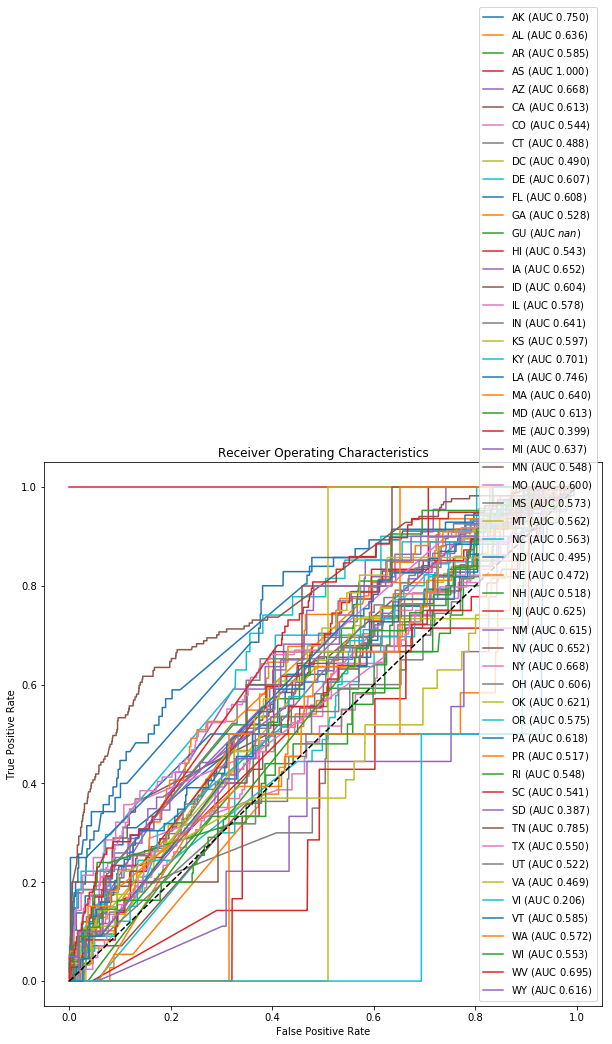

In [270]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_data_df)

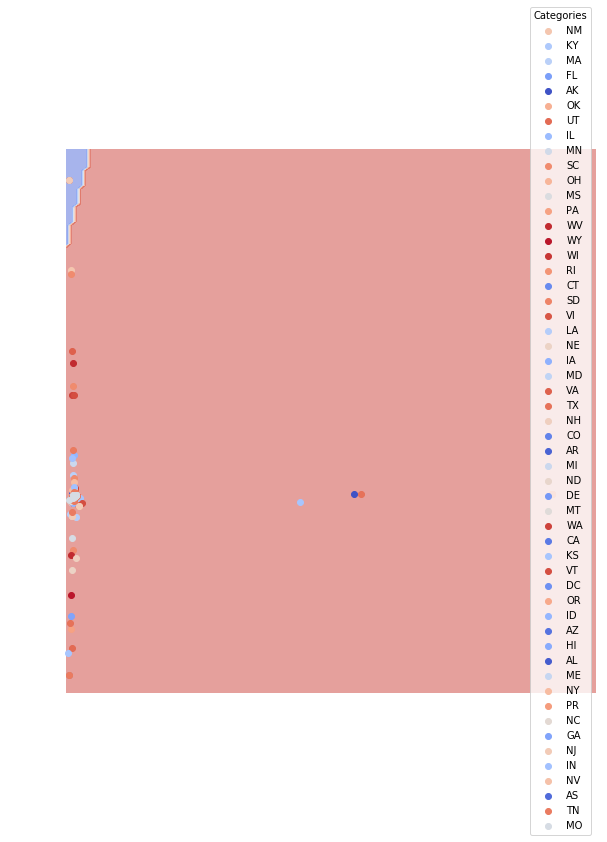

In [271]:
lucem_illud.plotregions(MultinomialNB_ng, test_data_df)

In [272]:
def predict_category(s, model, tfidf): #We just define a simple function here
    a = np.zeros((1, len(tfidf.vocabulary_)))
    for w in nltk.word_tokenize(s):
        try:
            a[:,tfidf.vocabulary_[lucem_illud.stemmer_basic.stem(w.lower())]] = 1
        except KeyError:
            print("Warning: '{}' not in vocabulary".format(w))
    return model.predict(a)[0]

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

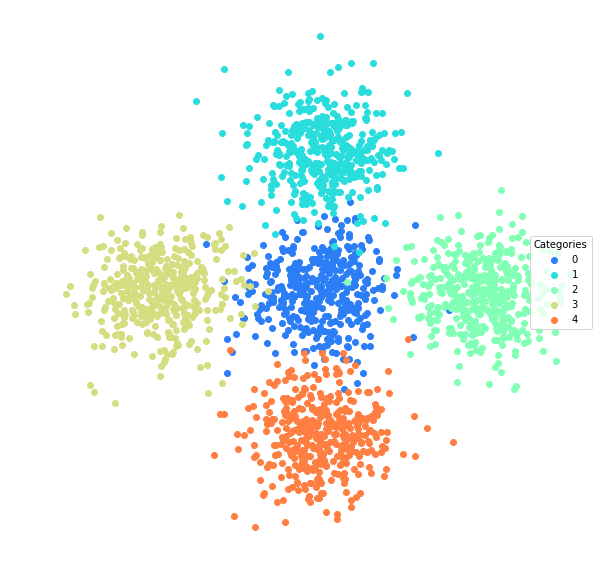

In [165]:
blobs_df = lucem_illud.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(blobs_df)
lucem_illud.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [166]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

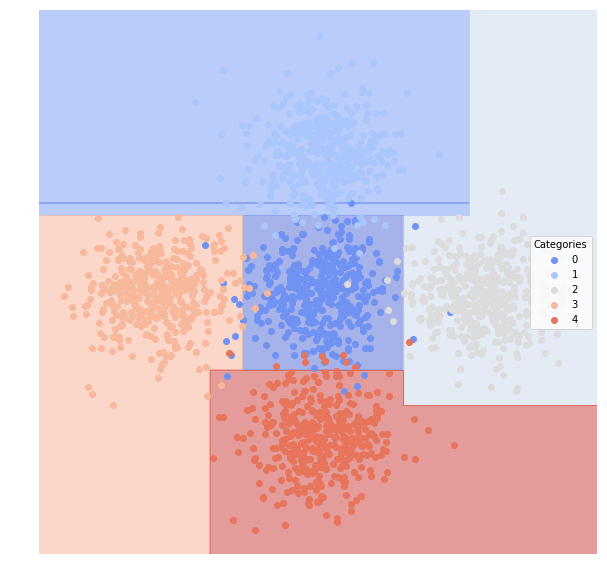

In [167]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [168]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.969891           0.944789       0.014   0.989899  0.942308
1         0.996341           0.967742       0.006   0.967742  1.000000
2         0.994681           0.991362       0.002   1.000000  0.989362
3         0.992890           0.975055       0.006   0.981982  0.990909
4         0.997487           0.980769       0.004   0.980769  1.000000

Lets look at accuracy:

In [169]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.984

What happens if we trim the tree?

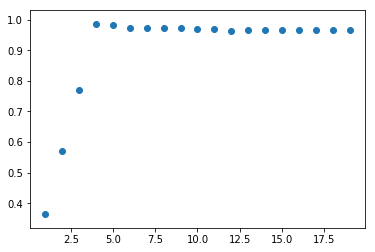

In [170]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [171]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [172]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

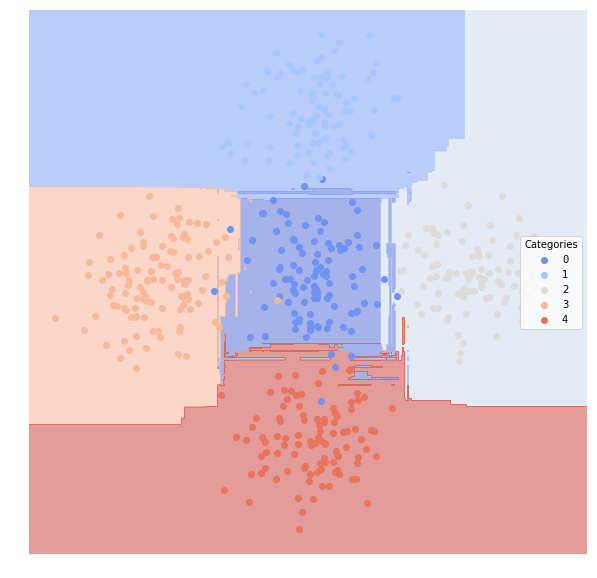

In [173]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [174]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.950660           0.914332       0.022   0.989474  0.903846
1         0.997561           0.978261       0.004   0.978261  1.000000
2         0.997537           0.979167       0.004   0.979167  1.000000
3         0.992890           0.975055       0.006   0.981982  0.990909
4         0.994975           0.962264       0.008   0.962264  1.000000

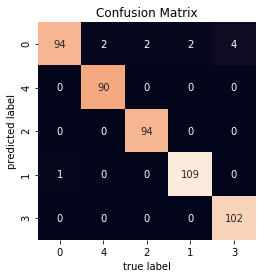

In [175]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

The decision tree classifier is also not doing a good job. The data seems to be classified in a very strange way, specially if we look at its spatial distribution. 

In [288]:
train_data_df['category'] =  train_data_df['democrat']
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=6,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

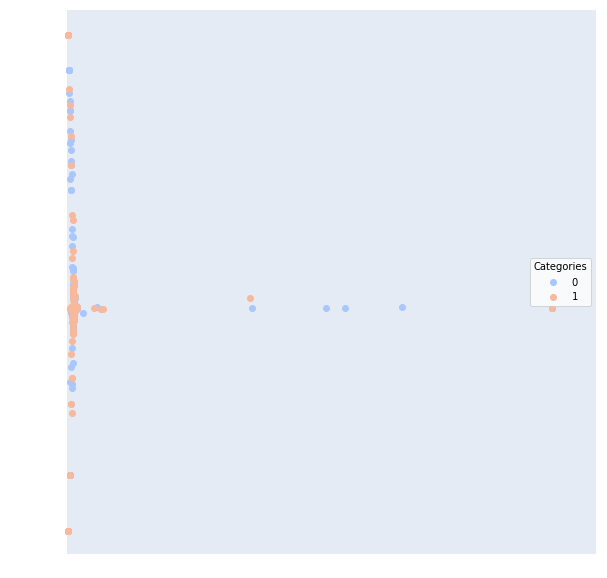

In [289]:
lucem_illud.plotregions(clf_tree, train_data_df)

In [290]:
lucem_illud.evaluateClassifier(clf_tree, train_data_df)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.519715           0.553587    0.439076   0.553667  0.992044
1         0.519715           0.474239    0.439076   0.833333  0.047387

In [291]:
sklearn.metrics.accuracy_score(train_data_df['category'],clf_tree.predict(np.stack(train_data_df['vect'], axis = 0)))

0.5609243697478992

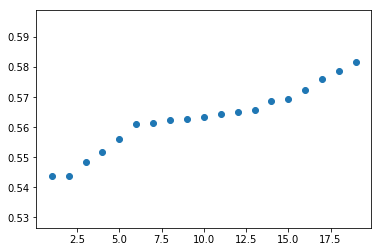

In [287]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(train_data_df['category'], tree2.predict(np.stack(train_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

The random forest classification seems to be doing something very similar. I am using 6 trees.

In [292]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=6) #Create an instance of our decision tree classifier.
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [293]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

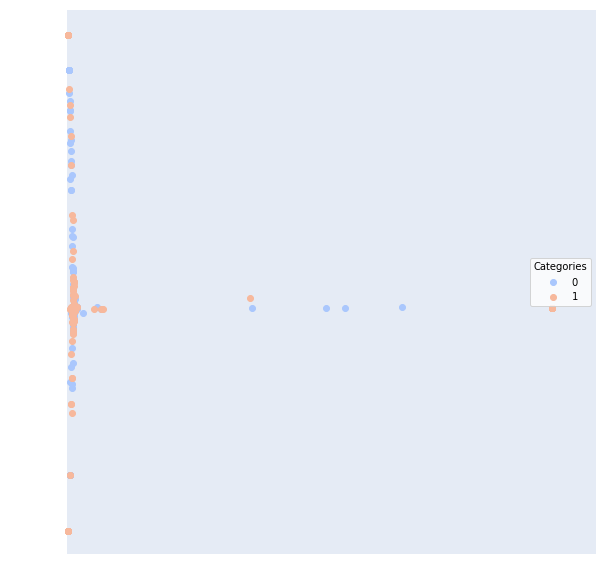

In [294]:
lucem_illud.plotregions(bag, train_data_df)

In [295]:
lucem_illud.evaluateClassifier(bag, train_data_df)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.546842           0.567912    0.414236   0.568084  0.992953
1         0.546842           0.503388    0.414236   0.923077  0.100731

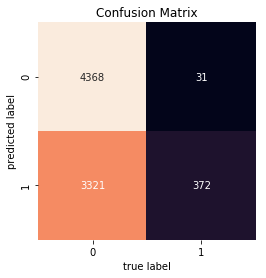

In [297]:
lucem_illud.plotConfusionMatrix(bag, train_data_df)

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [176]:
newsgroupsDF[:5]

category                                        source_file  \
0  talk.religion.misc  /Users/Reid/scikit_learn_data/20news_home/20ne...   
1  talk.religion.misc  /Users/Reid/scikit_learn_data/20news_home/20ne...   
2  talk.religion.misc  /Users/Reid/scikit_learn_data/20news_home/20ne...   
3  talk.religion.misc  /Users/Reid/scikit_learn_data/20news_home/20ne...   
4  talk.religion.misc  /Users/Reid/scikit_learn_data/20news_home/20ne...   

                                                text  \
0  \n\nParadise and salvation are not the same th...   
1  \nYou're admitting a lot more than that.  You ...   
2  \n\nJesus also recognized other holy days, lik...   
3  In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...   
4  \nI'm sorry, but He does not!  Ever read the F...   

                                      tokenized_text  \
0  [Paradise, and, salvation, are, not, the, same...   
1  [You, 're, admitting, a, lot, more, than, that...   
2  [Jesus, also, recognized, other, holy, days, ,...   
3  [In, <, lsjc8cINNmc1, @, saltillo.cs.utexas.ed...   
4  [I, 'm, sorry, ,, but, He, does, not, !, Ever,...   

                                     normalized_text  
0  [paradis, salvat, thing, salvat, better, refer...  
1  [admit, lot, admit, moral, situat, admit, acti...  
2  [jesus, also, recogn, holi, day, like, passov,...  
3  [turpin, russel, turpin, regard, love, less, b...  
4           [sorri, doe, ever, read, first, command]

Make a testing and training set:

In [177]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [178]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [179]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [180]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [181]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                     
soc.religion.christian  0.532718           0.302524    0.279745   0.495238   
talk.religion.misc      0.576672           0.208247    0.310505   0.256303   
comp.graphics           0.566162           0.290900    0.406849   0.321127   
sci.space               0.626089           0.373965    0.290192   0.490741   

                          Recall  
Category                          
soc.religion.christian  0.108108  
talk.religion.misc      0.402640  
comp.graphics           0.510067  
sci.space               0.430894

And lets look at the testing data

In [182]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.3116279069767442


Let's produce another confusion matrix:

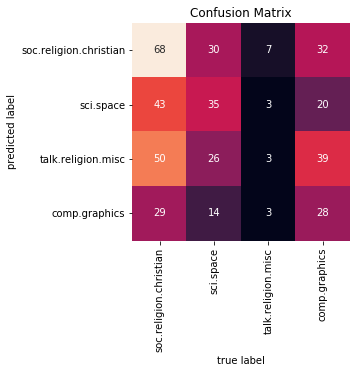

In [183]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [184]:
#lucem_illud.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

I classify using the TF-IDF vectors. I had originally classified the data using a k of 15 (by mistake), which didn't work very while. When I tried with k=2, the results improved significantly. Precision for the democrat category (democrat=1) gets to 96%. For the republican category thugh (democrat=0) it is only 63% (as seen in the confusion matrix). Average precision is aroun 0.63. 

In [307]:
n_neighbors = 2
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [310]:
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [311]:
lucem_illud.evaluateClassifier(clf_knearest, test_data_df)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.657778           0.635267    0.313396   0.636364  0.988179
1         0.657778           0.620846    0.313396   0.958763  0.327376

In [ ]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_data_df)

This classification method is similar to the one used in week 3. The main difference, though, is that this method creates neighbors based on an existent category which features' were obtained from training the model to create them in the testing data, while in the method used in week 3, the algorithm is unsupervised, meaning that it creates categories only minimizing the distance between objects within a cluster, and maximizing the distance between clusters.

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [185]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: nltk.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

We will tf.idf the data to make our vectors:

In [186]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [187]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [188]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

...and consider the results:

In [189]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

AUC  \
Category                                                       
Weeaboo Tales: stories about the extreme fans o...  0.988506   
Tales From Tech Support                             0.980815   
Bad Roommates: Tales of Irritation                  0.946416   
Relationships                                       0.968119   

                                                    Average_Precision  \
Category                                                                
Weeaboo Tales: stories about the extreme fans o...           0.983281   
Tales From Tech Support                                      0.942833   
Bad Roommates: Tales of Irritation                           0.902280   
Relationships                                                0.871134   

                                                    Error_Rate  Precision  \
Category                                                                    
Weeaboo Tales: stories about the extreme fans o...    0.006270   1.000000   
Tales From Tech Support                               0.015674   0.961538   
Bad Roommates: Tales of Irritation                    0.031348   0.973333   
Relationships                                         0.034483   0.888889   

                                                      Recall  
Category                                                      
Weeaboo Tales: stories about the extreme fans o...  0.977011  
Tales From Tech Support                             0.974026  
Bad Roommates: Tales of Irritation                  0.901235  
Relationships                                       0.972973

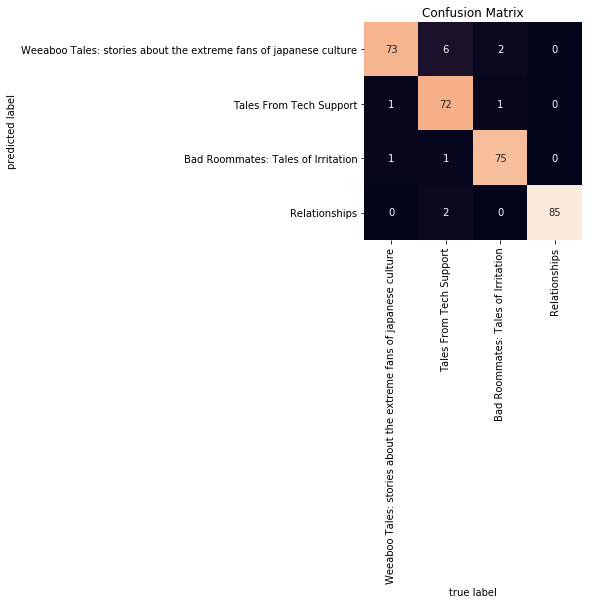

In [190]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

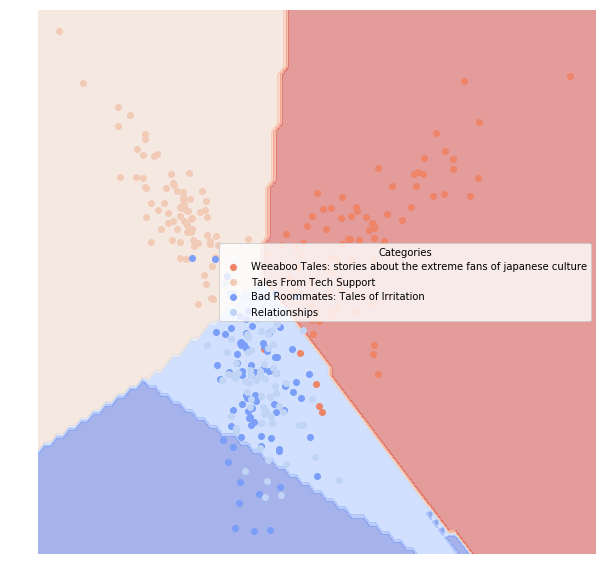

In [191]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [192]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [193]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

AUC  \
Category                                                       
Weeaboo Tales: stories about the extreme fans o...  0.986351   
Tales From Tech Support                             0.982881   
Bad Roommates: Tales of Irritation                  0.925667   
Relationships                                       0.954606   

                                                    Average_Precision  \
Category                                                                
Weeaboo Tales: stories about the extreme fans o...           0.971920   
Tales From Tech Support                                      0.954996   
Bad Roommates: Tales of Irritation                           0.839589   
Relationships                                                0.850719   

                                                    Error_Rate  Precision  \
Category                                                                    
Weeaboo Tales: stories about the extreme fans o...    0.009404   0.988372   
Tales From Tech Support                               0.012539   0.974026   
Bad Roommates: Tales of Irritation                    0.050157   0.922078   
Relationships                                         0.040752   0.886076   

                                                      Recall  
Category                                                      
Weeaboo Tales: stories about the extreme fans o...  0.977011  
Tales From Tech Support                             0.974026  
Bad Roommates: Tales of Irritation                  0.876543  
Relationships                                       0.945946

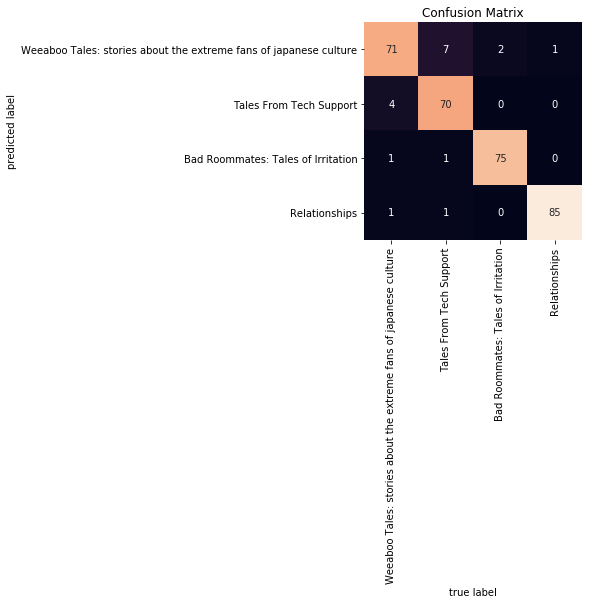

In [194]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

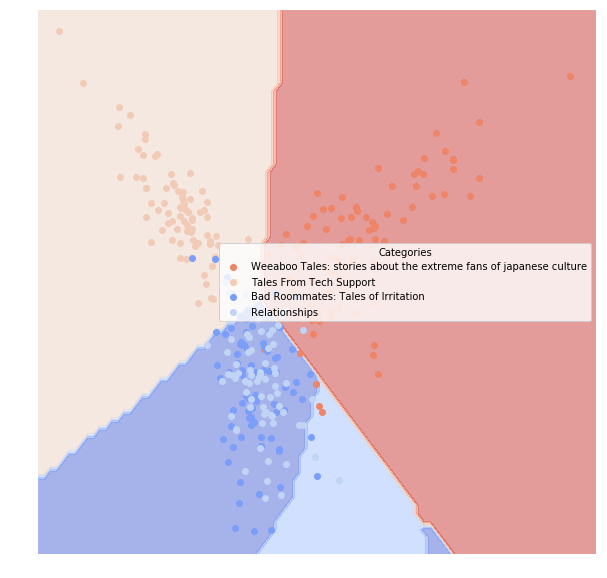

In [195]:
lucem_illud.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

The neural net classifier works way better than the classifiers shown above. It reaches, for example, a precision of 94% for republicans and 74% for democrats. What I don't very well, though, is why in the plot I can see a lot of dots that dont match the original categorization, while the metrics give me different information).

In [302]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [303]:
lucem_illud.evaluateClassifier(clf_nn, train_data_df)

AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.840367           0.838199    0.169427   0.948194  0.728120
1         0.840367           0.732550    0.169427   0.746288  0.952613

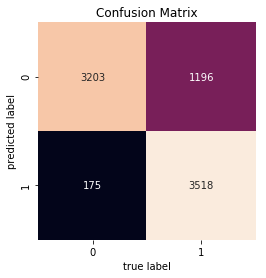

In [304]:
lucem_illud.plotConfusionMatrix(clf_nn, train_data_df)

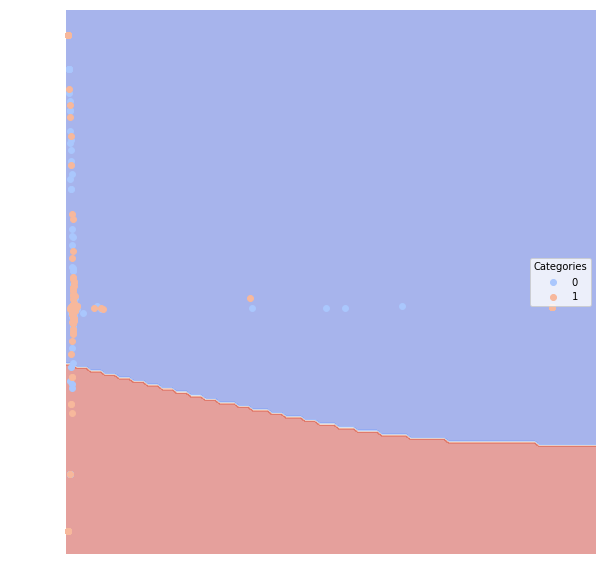

In [305]:
lucem_illud.plotregions(clf_nn, train_data_df)